# Modelos de aprednizado de máquinas voltados para tarefas de classificação

# 1. Importação e leitura dos dados

**Importação dos dados**

In [1]:
# Package
library(quantmod)

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.


**Leitura dos dados**

In [2]:
getSymbols("^GSPC", from = '2000-01-01', to = '2021-05-31')   # dataset escolhido: US

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.



[1] "^GSPC"

# 2. Inspeção do dataset

**Inspeção da frequência dos dados**

In [3]:
periodicity(GSPC)

Daily periodicity from 2000-01-03 to 2021-04-14 

**Inspeção das primeiras linhas**

In [4]:
head(GSPC)

           GSPC.Open GSPC.High GSPC.Low GSPC.Close GSPC.Volume GSPC.Adjusted
2000-01-03   1469.25   1478.00  1438.36    1455.22   931800000       1455.22
2000-01-04   1455.22   1455.22  1397.43    1399.42  1009000000       1399.42
2000-01-05   1399.42   1413.27  1377.68    1402.11  1085500000       1402.11
2000-01-06   1402.11   1411.90  1392.10    1403.45  1092300000       1403.45
2000-01-07   1403.45   1441.47  1400.73    1441.47  1225200000       1441.47
2000-01-10   1441.47   1464.36  1441.47    1457.60  1064800000       1457.60

**Análise gráfica**

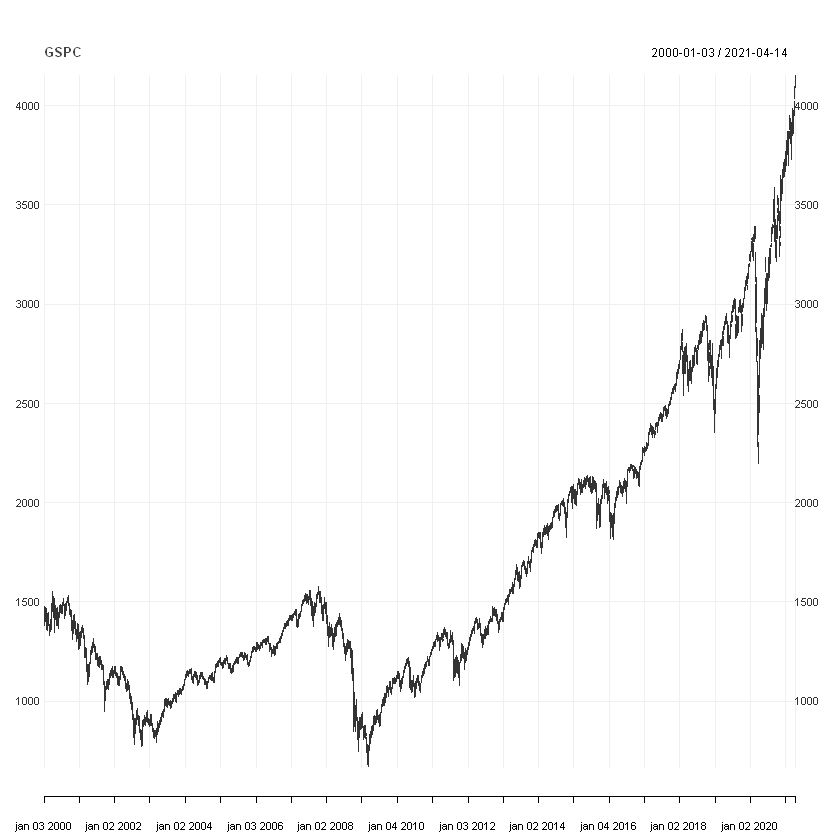

In [5]:
chart_Series(GSPC)

# 3. Construção das variáveis

In [6]:
# Package
library(TTR)

In [7]:
v.excluded <- c('GSPC.Open', 'GSPC.Volume', 'GSPC.Adjusted')

GSPC2 <- GSPC[, !(names(GSPC) %in% v.excluded)]

In [8]:
dim(GSPC2)

[1] 5354    3

## 3.1. Variáveis técnicas

In [9]:
# Log-Returns
GSPC.Return <- ts(round(log(GSPC2$GSPC.Close) - log(Lag(GSPC2$GSPC.Close, 1)), 2))

# Simple moving average (SMA)
GSPC.SMA <- ts(round(SMA(GSPC2$GSPC.Close, 10), 2))  # 10 days

# Weighted moving average (WMA)
GSPC.WMA <- ts(round(WMA(GSPC2$GSPC.Close, 10), 2))  # 10 days

# Standard deviation (STD)
GSPC.STD10 <- ts(round(rollapply(GSPC$GSPC.Close, 10, sd), 2))

# Momentum (mom)
GSPC.MOM <- ts(round(momentum(GSPC2$GSPC.Close, n = 1), 2))

# Rate Of Change (ROC)
GSPC.ROC <- ts(round(ROC(GSPC2$GSPC.Close), 2))

# Stochastic K% AND D%
GSPC.StochK <- ts(round(stoch(GSPC2)$fastK, 2))    # fastK
GSPC.StochD <- ts(round(stoch(GSPC2)$fastD, 2))    # fastD

# Relative Strength Index (RSI)
GSPC.RSI <- ts(round(RSI(GSPC2$GSPC.Close, n = 7, maType = "SMA"), 2))

# William's %R (WPR)
GSPC.WPR <- ts(round(WPR(GSPC2, n = 14), 2))

# The Average Direction Index (trend strength) (ADX) & The Direction Index (DX)
GSPC.ADX <- ts(round(ADX(GSPC2)$ADX, 2))
GSPC.DX <- ts(round(ADX(GSPC2)$DX, 2))

# Commodity Channel Index (CCI)
GSPC.CCI <- ts(round(CCI(GSPC2), 2))

# Chande Momentum Oscillator (CMO)
GSPC.CMO <- ts(round(CMO(GSPC$GSPC.Close), 2))

# Triple Smoothed Exponential Oscillator (TRIX)
GSPC.TRIX <- ts(round(TRIX(GSPC$GSPC.Close)$TRIX, 2))

# Moving Average Convergence Divergence (MACD)
GSPC.MACD <- ts(round(MACD(GSPC2$GSPC.Close, 12, 26, 9, maType = "EMA")$macd, 2))
GSPC.Signal <- ts(round(MACD(GSPC2$GSPC.Close, 12, 26, 9, maType = "EMA")$signal, 2))
GSPC.Histogram <- ts(round(GSPC.MACD - GSPC.Signal, 2))

# Bollinger Bands (BBANDS)
GSPC.bbup <- BBands(GSPC2, n = 20, sd = 2)$up
GSPC.bbdn <- BBands(GSPC2, n = 20, sd = 2)$dn
GSPC.BBANDS <- ts(round(GSPC.bbup - GSPC.bbdn, 2))

In [10]:
v.technical <- cbind(GSPC.Return, GSPC.SMA, GSPC.WMA, GSPC.STD10, GSPC.MOM, GSPC.ROC, GSPC.StochK, GSPC.StochD, GSPC.RSI,
                     GSPC.WPR, GSPC.ADX, GSPC.DX, GSPC.CCI, GSPC.CMO, GSPC.TRIX, GSPC.MACD, GSPC.Signal, GSPC.Histogram,
                     GSPC.BBANDS)

In [11]:
dim(v.technical)

[1] 5354   19

In [12]:
GSPC.df <- as.data.frame(cbind(GSPC2, v.technical))
head(GSPC.df)

GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.STD10,GSPC.MOM,GSPC.ROC,GSPC.StochK,...,GSPC.WPR,GSPC.ADX,GSPC.DX,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.BBANDS
1478.00,1438.36,1455.22,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1455.22,1397.43,1399.42,-0.04,NA,NA,NA,-55.80,-0.04,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1413.27,1377.68,1402.11,0.00,NA,NA,NA,2.69,0.00,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1411.90,1392.10,1403.45,0.00,NA,NA,NA,1.34,0.00,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1441.47,1400.73,1441.47,0.03,NA,NA,NA,38.02,0.03,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1464.36,1441.47,1457.60,0.01,NA,NA,NA,16.13,0.01,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [13]:
tail(GSPC.df)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.STD10,GSPC.MOM,GSPC.ROC,GSPC.StochK,...,GSPC.WPR,GSPC.ADX,GSPC.DX,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.BBANDS
5349,4083.13,4068.31,4079.95,0.00,3992.74,4024.97,68.48,6.01,0.00,0.97,...,0.03,14.71,28.62,188.90,28.55,0.10,1.17,0.83,0.34,216.26
5350,4098.19,4082.54,4097.17,0.00,4013.54,4043.96,65.03,17.22,0.00,1.00,...,0.00,15.95,32.02,171.60,55.19,0.10,1.28,0.92,0.36,236.34
5351,4129.48,4095.51,4128.80,0.01,4035.47,4064.92,62.99,31.63,0.01,1.00,...,0.00,17.56,38.55,164.62,60.16,0.11,1.40,1.01,0.39,265.99
5352,4131.76,4114.82,4127.99,0.00,4050.82,4081.74,65.15,-0.81,0.00,0.99,...,0.01,19.10,39.01,141.75,56.47,0.12,1.48,1.11,0.37,290.15
5353,4148.00,4124.43,4141.59,0.00,4067.87,4098.24,64.27,13.60,0.00,0.98,...,0.02,20.75,42.33,130.61,73.27,0.13,1.56,1.20,0.36,315.02
5354,4151.69,4121.20,4126.63,0.00,4084.67,4108.93,53.60,-14.96,0.00,0.92,...,0.08,22.35,43.08,109.16,76.87,0.14,1.56,1.27,0.29,333.90


## 3.2. Variáveis de direção

In [14]:
# Direção numérica
GSPC.Direction <- NULL
GSPC.Direction[GSPC2$GSPC.Close >= lag(GSPC2$GSPC.Close, -1)] <- 0           # P(t) >= P(t+1)
GSPC.Direction[GSPC2$GSPC.Close < lag(GSPC2$GSPC.Close, -1)] <- 1            # P(t) < P(t+1)

In [15]:
# Direção não numérica
GSPC.Trend <- NULL
GSPC.Trend[GSPC2$GSPC.Close > lag(GSPC2$GSPC.Close, -1)] <- "down"           # P(t) > P(t+1)
GSPC.Trend[GSPC2$GSPC.Close < lag(GSPC2$GSPC.Close, -1)] <- "up"             # P(t) < P(t+1)
GSPC.Trend[GSPC2$GSPC.Close == lag(GSPC2$GSPC.Close, -1)] <- "nowhere"       # P(t) = P(t+1)

In [16]:
head(cbind(GSPC.Direction, GSPC.Trend))

GSPC.Direction,GSPC.Trend
0,down
1,up
1,up
1,up
1,up
0,down


In [17]:
tail(cbind(GSPC.Direction, GSPC.Trend))

,GSPC.Direction,GSPC.Trend
"[5349,]",1,up
"[5350,]",1,up
"[5351,]",0,down
"[5352,]",1,up
"[5353,]",0,down
"[5354,]",NA,NA


In [18]:
# Agregando as séries de direção ao dataset
GSPC.df1 <- as.data.frame(cbind(GSPC.df, GSPC.Direction, GSPC.Trend))
tail(GSPC.df1)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.STD10,GSPC.MOM,GSPC.ROC,GSPC.StochK,...,GSPC.DX,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.BBANDS,GSPC.Direction,GSPC.Trend
5349,4083.13,4068.31,4079.95,0.00,3992.74,4024.97,68.48,6.01,0.00,0.97,...,28.62,188.90,28.55,0.10,1.17,0.83,0.34,216.26,1,up
5350,4098.19,4082.54,4097.17,0.00,4013.54,4043.96,65.03,17.22,0.00,1.00,...,32.02,171.60,55.19,0.10,1.28,0.92,0.36,236.34,1,up
5351,4129.48,4095.51,4128.80,0.01,4035.47,4064.92,62.99,31.63,0.01,1.00,...,38.55,164.62,60.16,0.11,1.40,1.01,0.39,265.99,0,down
5352,4131.76,4114.82,4127.99,0.00,4050.82,4081.74,65.15,-0.81,0.00,0.99,...,39.01,141.75,56.47,0.12,1.48,1.11,0.37,290.15,1,up
5353,4148.00,4124.43,4141.59,0.00,4067.87,4098.24,64.27,13.60,0.00,0.98,...,42.33,130.61,73.27,0.13,1.56,1.20,0.36,315.02,0,down
5354,4151.69,4121.20,4126.63,0.00,4084.67,4108.93,53.60,-14.96,0.00,0.92,...,43.08,109.16,76.87,0.14,1.56,1.27,0.29,333.90,NA,NA


**Inspeção da estrutura do dataset**

In [19]:
str(GSPC.df1)

'data.frame':	5354 obs. of  24 variables:
 $ GSPC.High     : num  1478 1455 1413 1412 1441 ...
 $ GSPC.Low      : num  1438 1397 1378 1392 1401 ...
 $ GSPC.Close    : num  1455 1399 1402 1403 1441 ...
 $ GSPC.Return   : num  NA -0.04 0 0 0.03 0.01 -0.01 0 0.01 0.01 ...
 $ GSPC.SMA      : num  NA NA NA NA NA ...
 $ GSPC.WMA      : num  NA NA NA NA NA ...
 $ GSPC.STD10    : num  NA NA NA NA NA NA NA NA NA 24.6 ...
 $ GSPC.MOM      : num  NA -55.8 2.69 1.34 38.02 ...
 $ GSPC.ROC      : num  NA -0.04 0 0 0.03 0.01 -0.01 0 0.01 0.01 ...
 $ GSPC.StochK   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.StochD   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.RSI      : num  NA NA NA NA NA ...
 $ GSPC.WPR      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.ADX      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.DX       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.CCI      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.CMO      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ GSPC.TRIX 

# 4. Análise exploratória dos dados

## 4.1. Dados ausentes

**Identificação dos dados ausentes**

In [20]:
round(prop.table(table(is.na(GSPC.df1)))*100, digits = 2)[2]

# Mesmo com os NA's nas primeiras linhas e nas últimas linhas, o % de NA's total é inferior a 1%

TRUE 
0.25

**Remoção dos dados ausentes**

In [21]:
GSPC.df2 <- na.omit(GSPC.df1)
round(prop.table(table(is.na(GSPC.df2)))*100, digits = 2)[2]

<NA> 
  NA

**Inspeção da estrutura dos dados**

In [22]:
str(GSPC.df2)

'data.frame':	5295 obs. of  24 variables:
 $ GSPC.High     : num  1535 1527 1521 1517 1520 ...
 $ GSPC.Low      : num  1518 1507 1497 1475 1484 ...
 $ GSPC.Close    : num  1524 1508 1509 1488 1499 ...
 $ GSPC.Return   : num  0 -0.01 0 -0.01 0.01 0 -0.01 0 0.01 0.01 ...
 $ GSPC.SMA      : num  1470 1485 1497 1500 1503 ...
 $ GSPC.WMA      : num  1497 1504 1508 1506 1506 ...
 $ GSPC.STD10    : num  57.4 42.8 27.9 24.8 21.5 ...
 $ GSPC.MOM      : num  -3.6 -16.13 0.79 -20.6 10.66 ...
 $ GSPC.ROC      : num  0 -0.01 0 -0.01 0.01 0 -0.01 0 0.01 0.01 ...
 $ GSPC.StochK   : num  0.86 0.77 0.77 0.67 0.72 0.76 0.64 0.52 0.62 0.73 ...
 $ GSPC.StochD   : num  0.9 0.84 0.8 0.74 0.72 0.72 0.71 0.64 0.59 0.62 ...
 $ GSPC.RSI      : num  87 72 78.4 46 48.7 ...
 $ GSPC.WPR      : num  0.14 0.23 0.23 0.33 0.28 0.24 0.36 0.48 0.38 0.27 ...
 $ GSPC.ADX      : num  26.4 27.3 27.7 27 26.5 ...
 $ GSPC.DX       : num  47 39.2 32.7 18.7 19.7 ...
 $ GSPC.CCI      : num  130.5 101.7 85.4 59.7 62.6 ...
 $ GSPC.C

Como as análises exploratória e o preprocessamento de dados focam nas features, a partir deste momento trabalharemos com o dataframe sem as variáveis de direção.

In [23]:
v.direction <- c('GSPC.Direction', 'GSPC.Trend')
GSPC.df3 <- GSPC.df2[, !(names(GSPC.df2) %in% v.direction)]

In [24]:
str(GSPC.df3)

'data.frame':	5295 obs. of  22 variables:
 $ GSPC.High     : num  1535 1527 1521 1517 1520 ...
 $ GSPC.Low      : num  1518 1507 1497 1475 1484 ...
 $ GSPC.Close    : num  1524 1508 1509 1488 1499 ...
 $ GSPC.Return   : num  0 -0.01 0 -0.01 0.01 0 -0.01 0 0.01 0.01 ...
 $ GSPC.SMA      : num  1470 1485 1497 1500 1503 ...
 $ GSPC.WMA      : num  1497 1504 1508 1506 1506 ...
 $ GSPC.STD10    : num  57.4 42.8 27.9 24.8 21.5 ...
 $ GSPC.MOM      : num  -3.6 -16.13 0.79 -20.6 10.66 ...
 $ GSPC.ROC      : num  0 -0.01 0 -0.01 0.01 0 -0.01 0 0.01 0.01 ...
 $ GSPC.StochK   : num  0.86 0.77 0.77 0.67 0.72 0.76 0.64 0.52 0.62 0.73 ...
 $ GSPC.StochD   : num  0.9 0.84 0.8 0.74 0.72 0.72 0.71 0.64 0.59 0.62 ...
 $ GSPC.RSI      : num  87 72 78.4 46 48.7 ...
 $ GSPC.WPR      : num  0.14 0.23 0.23 0.33 0.28 0.24 0.36 0.48 0.38 0.27 ...
 $ GSPC.ADX      : num  26.4 27.3 27.7 27 26.5 ...
 $ GSPC.DX       : num  47 39.2 32.7 18.7 19.7 ...
 $ GSPC.CCI      : num  130.5 101.7 85.4 59.7 62.6 ...
 $ GSPC.C

## 4.2. Estatística descritiva

In [25]:
summary(GSPC.df3)

   GSPC.High         GSPC.Low        GSPC.Close      GSPC.Return        
 Min.   : 695.3   Min.   : 666.8   Min.   : 676.5   Min.   :-0.1300000  
 1st Qu.:1173.0   1st Qu.:1155.4   1st Qu.:1164.6   1st Qu.: 0.0000000  
 Median :1401.2   Median :1379.7   Median :1391.0   Median : 0.0000000  
 Mean   :1695.0   Mean   :1674.7   Mean   :1685.5   Mean   : 0.0001549  
 3rd Qu.:2097.0   3rd Qu.:2079.3   3rd Qu.:2088.8   3rd Qu.: 0.0100000  
 Max.   :4148.0   Max.   :4124.4   Max.   :4141.6   Max.   : 0.1100000  
    GSPC.SMA         GSPC.WMA        GSPC.STD10         GSPC.MOM        
 Min.   : 707.9   Min.   : 700.9   Min.   :  2.760   Min.   :-324.8900  
 1st Qu.:1162.9   1st Qu.:1162.5   1st Qu.:  9.935   1st Qu.:  -7.1750  
 Median :1392.3   Median :1392.6   Median : 14.900   Median :   0.9700  
 Mean   :1683.3   Mean   :1684.0   Mean   : 19.596   Mean   :   0.4937  
 3rd Qu.:2084.2   3rd Qu.:2085.3   3rd Qu.: 23.170   3rd Qu.:   8.9800  
 Max.   :4067.9   Max.   :4098.2   Max.   :245.110 

É possível analisar a frequência de cada direção não numérica

In [26]:
summary(GSPC.df2$GSPC.Trend)

down nowhere      up 
   2447       3    2845

## 4.3. Identificação de outliers

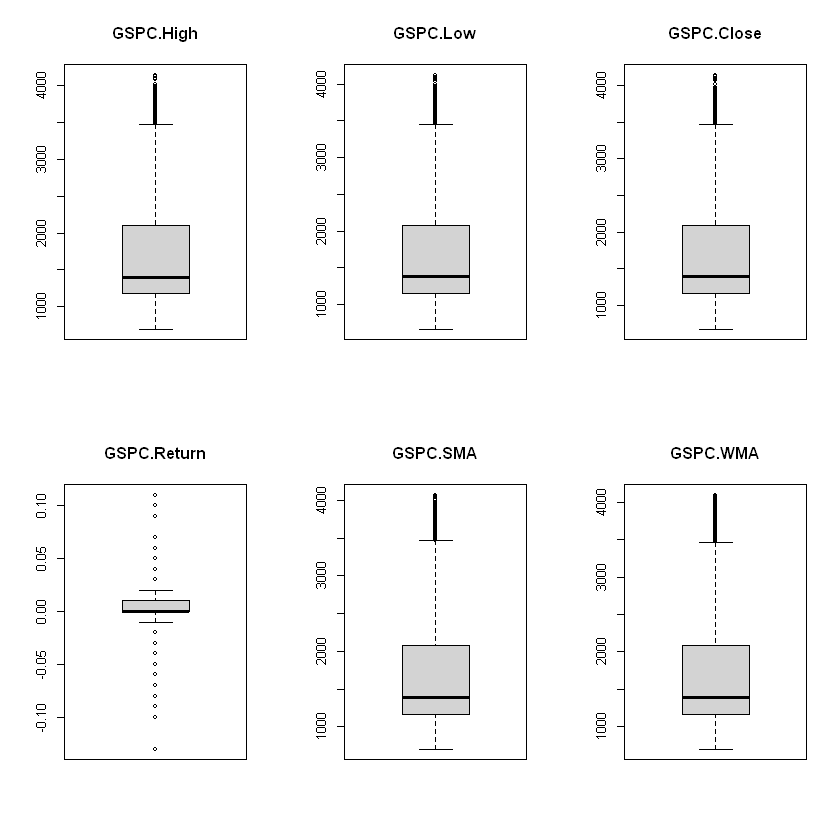

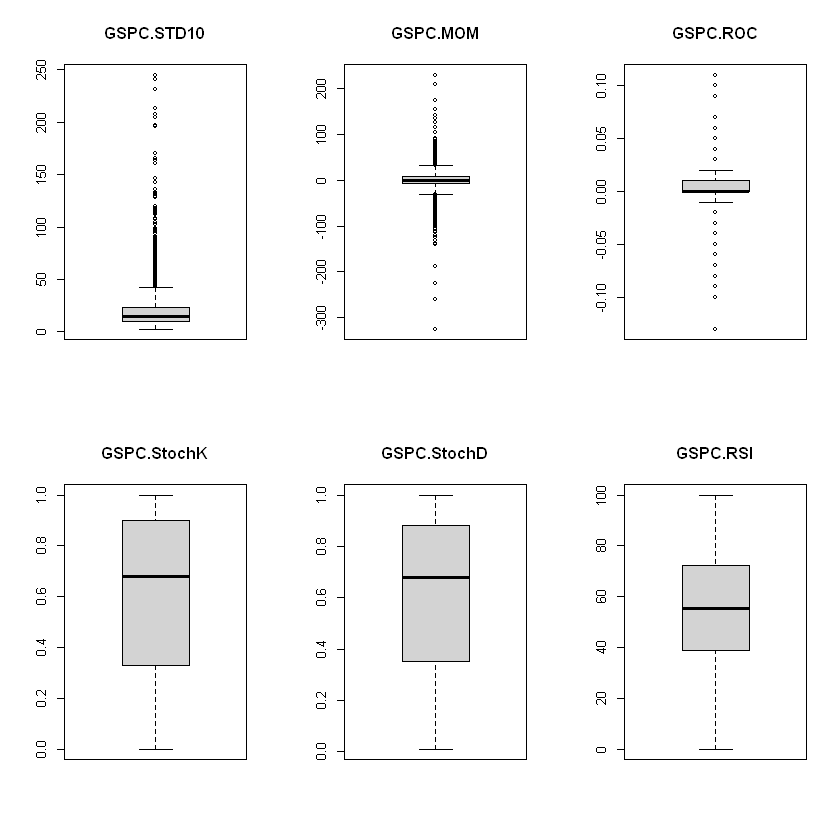

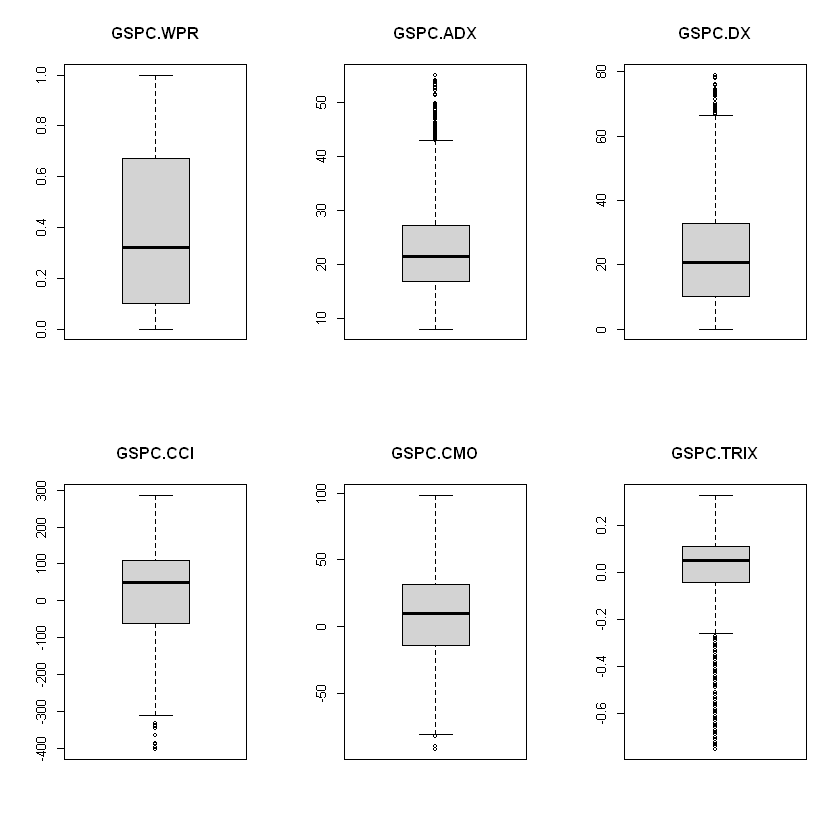

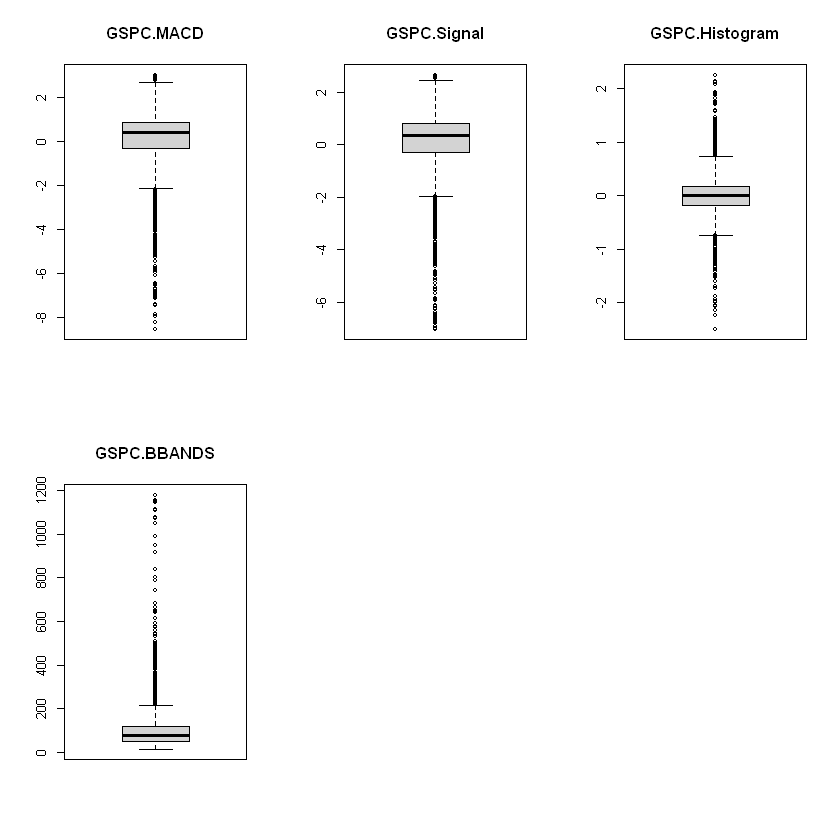

In [27]:
par(mfrow=c(2, 3))

for (column in colnames(GSPC.df3)){
    boxplot(GSPC.df3[,column], col = 'light grey', main = column, border = 'black', horizontal = FALSE)
}

## 4.4. Histogramas

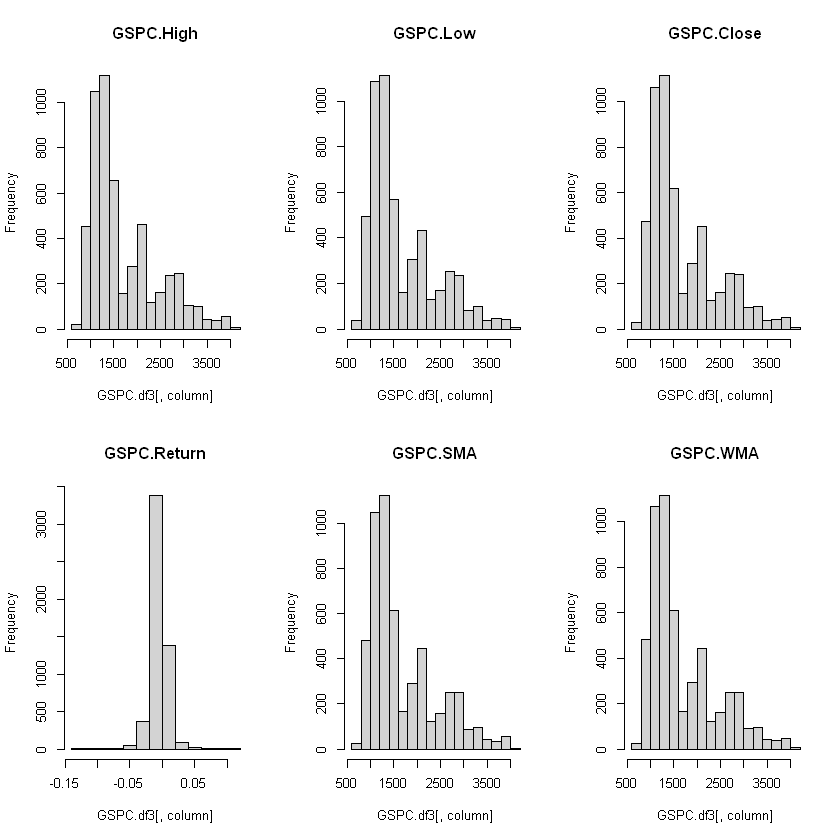

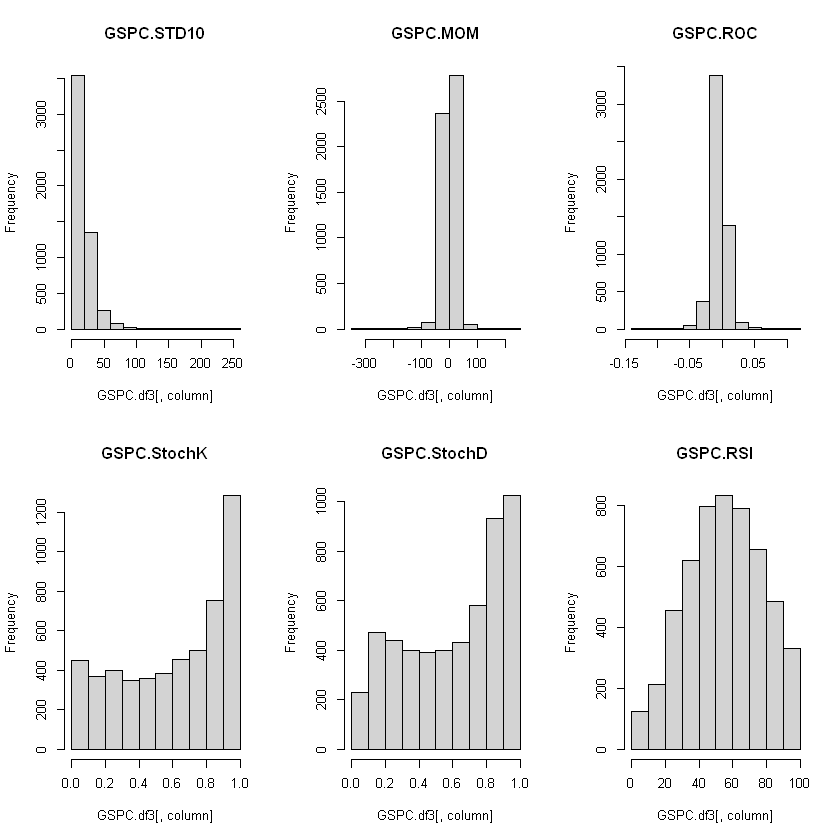

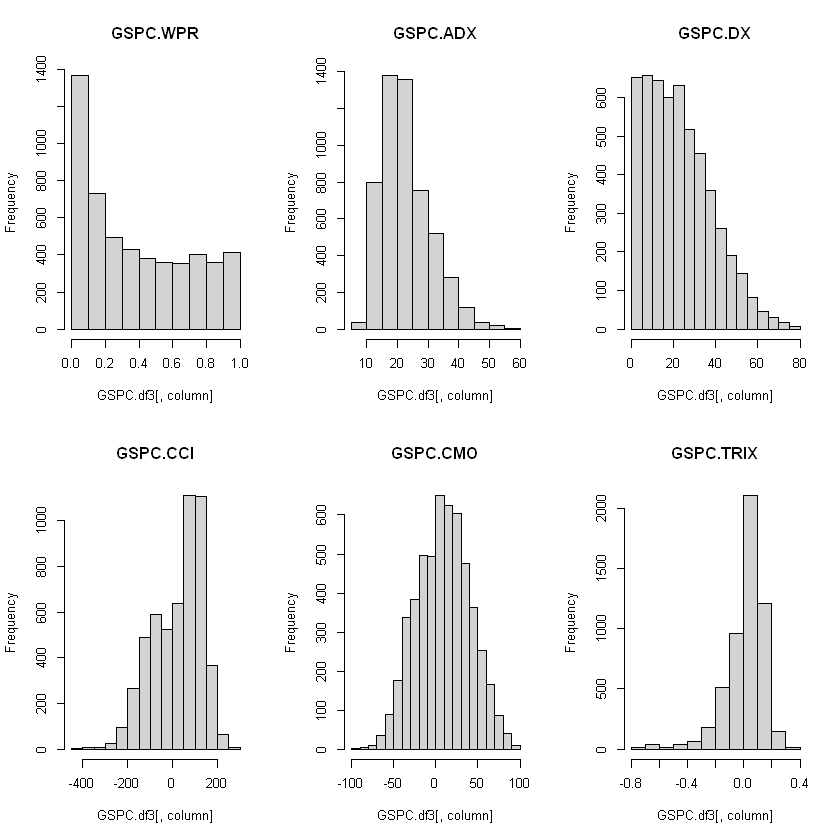

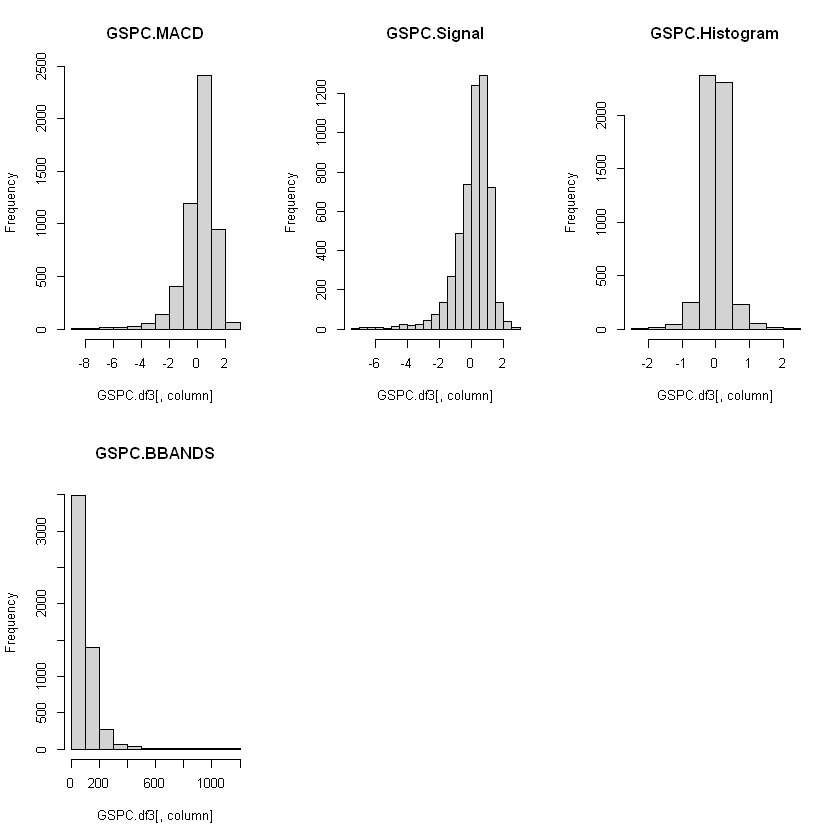

In [28]:
par(mfrow=c(2, 3))

for (column in colnames(GSPC.df3)){
    hist(GSPC.df3[,column], col = 'light grey', main = column, border = 'black')
}

## 4.5. Densidades

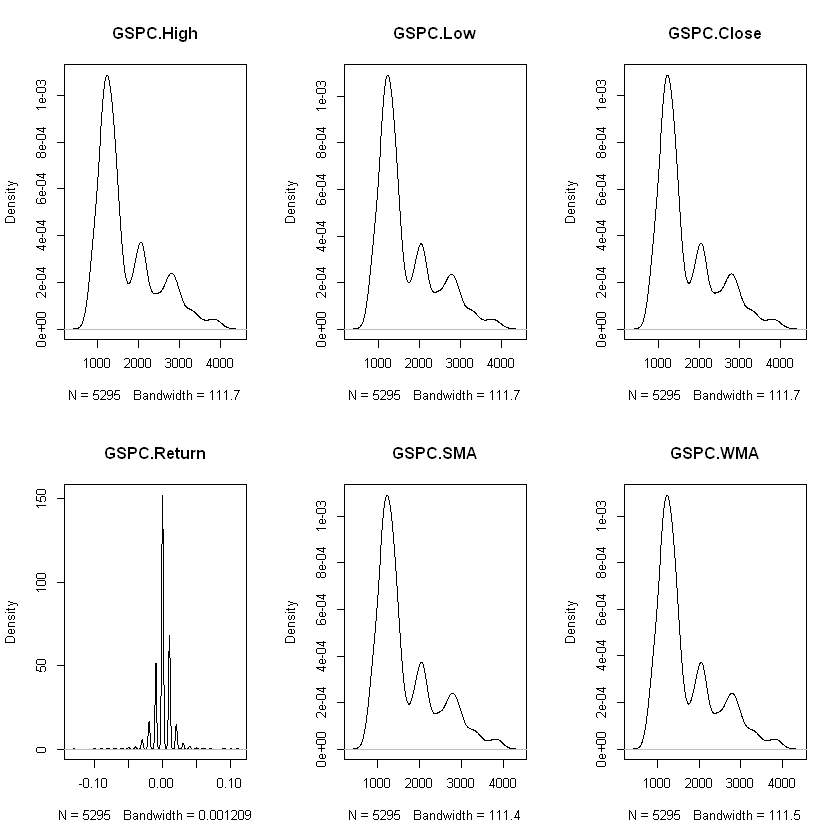

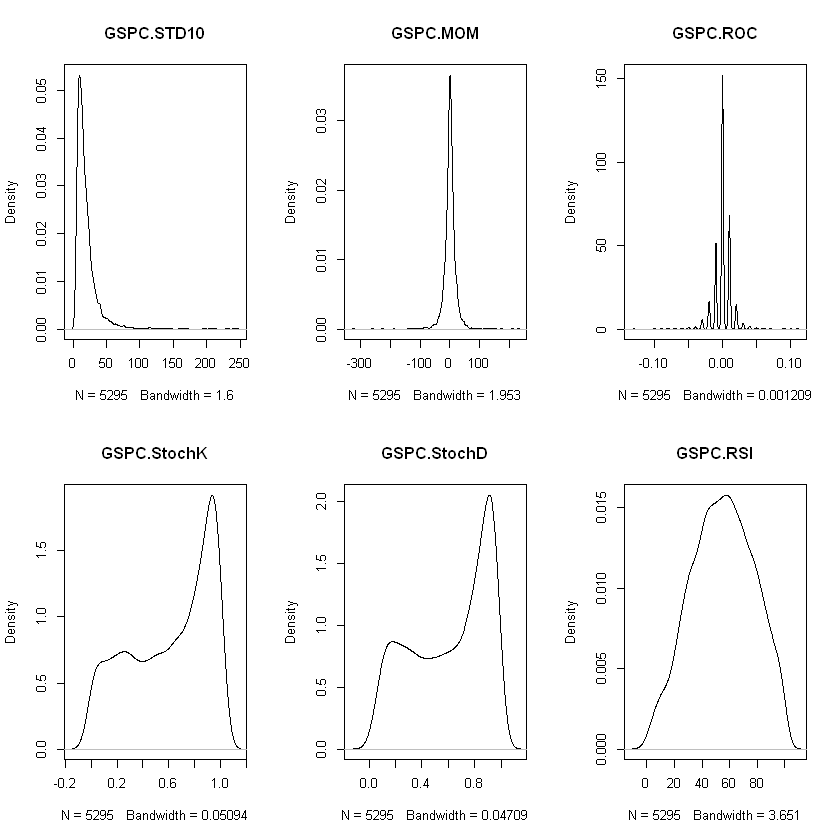

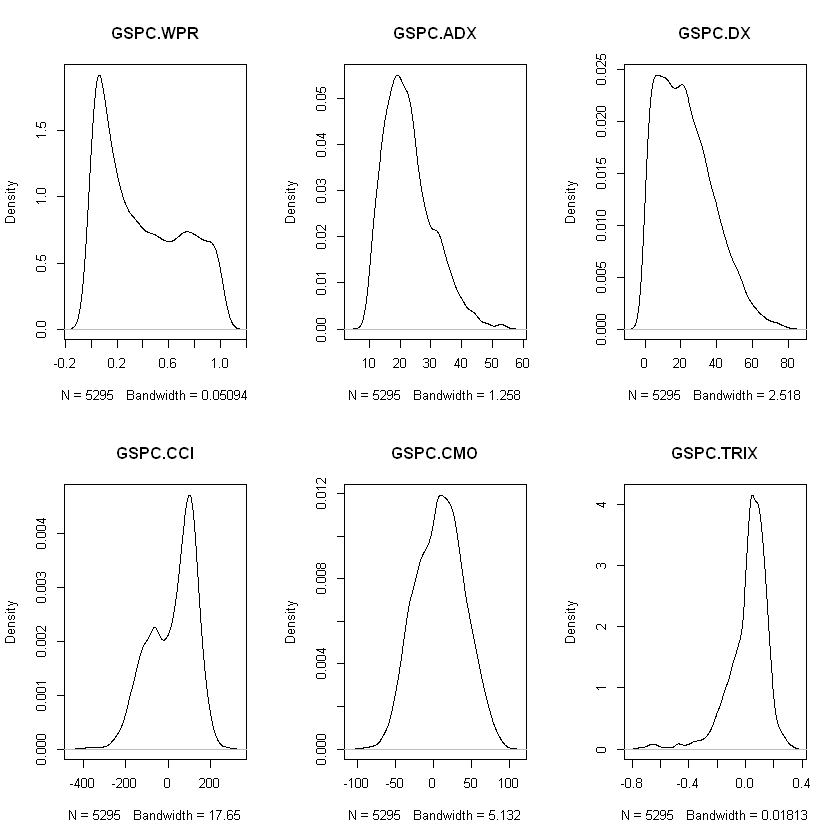

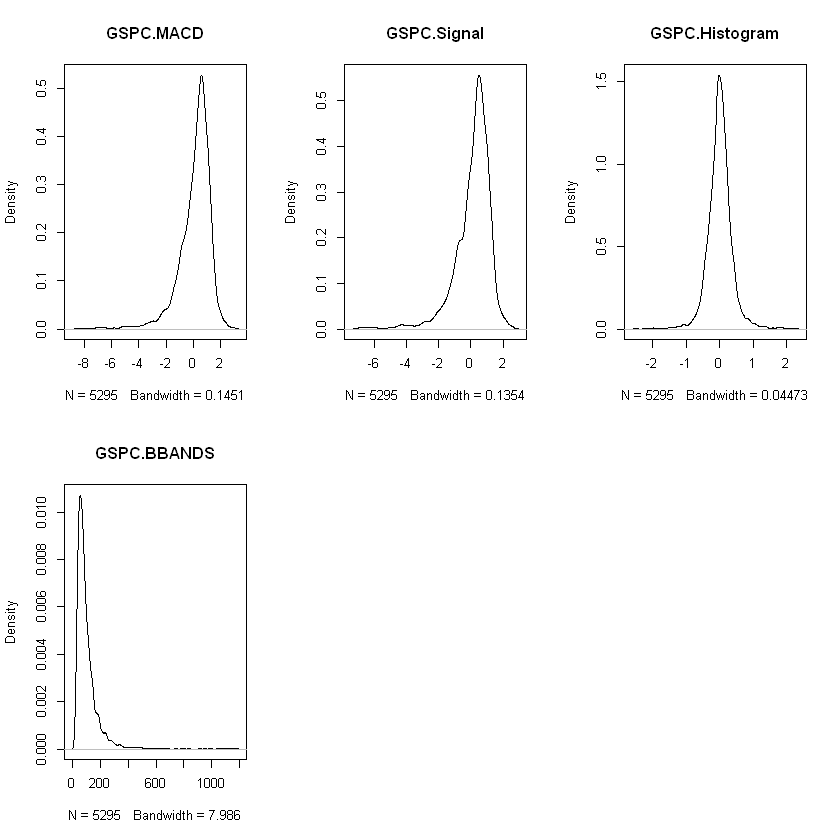

In [29]:
par(mfrow=c(2, 3))

for (column in colnames(GSPC.df3)){
    plot(density(GSPC.df3[,column]), main = column)
}

## 4.6. QQPlot

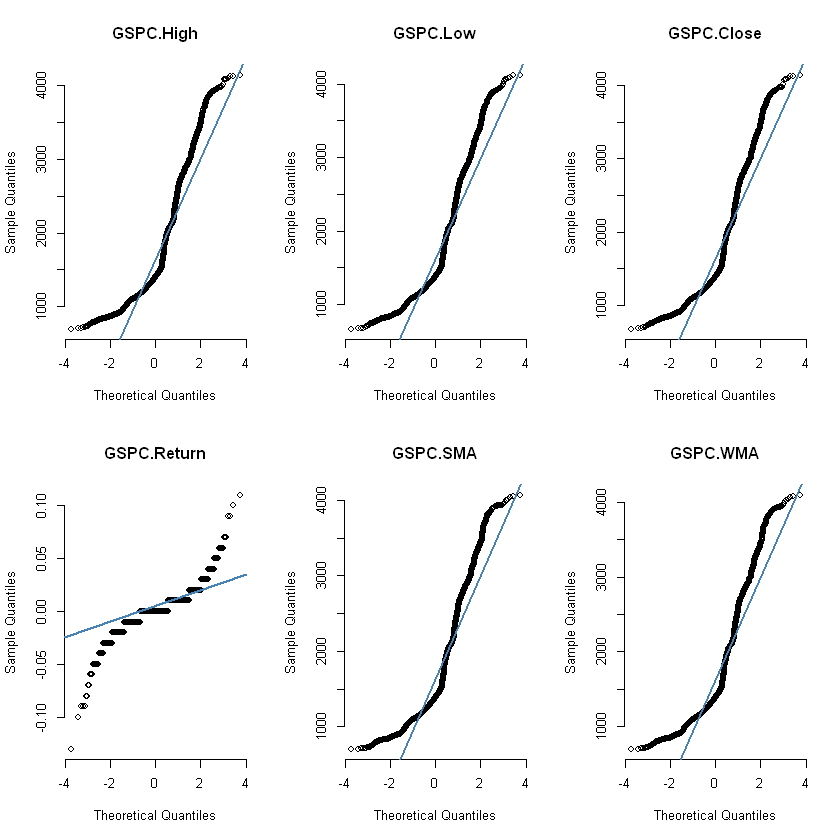

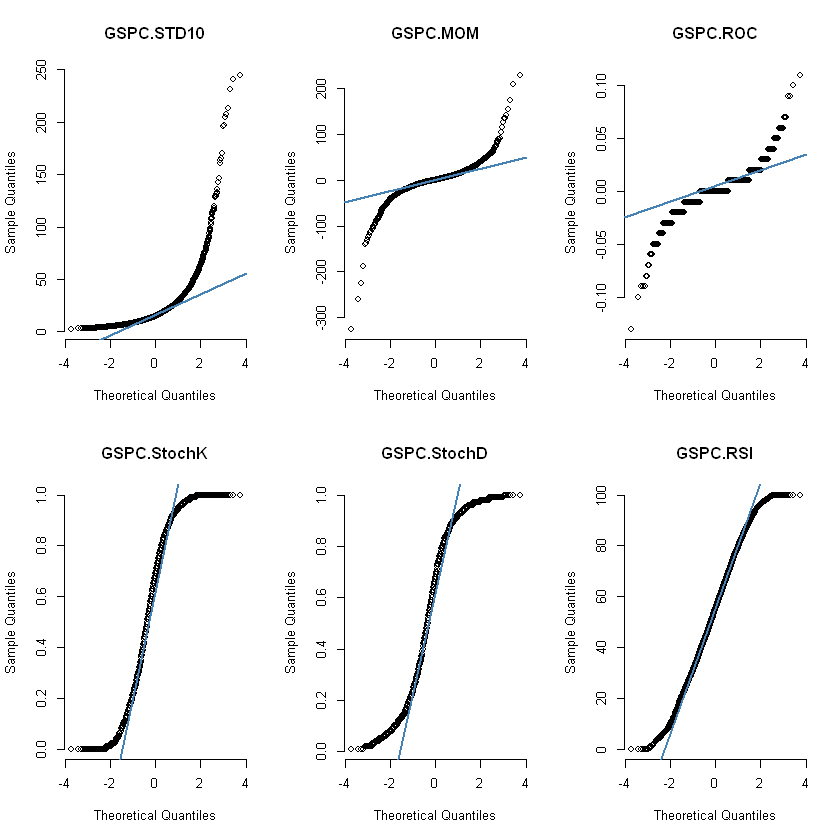

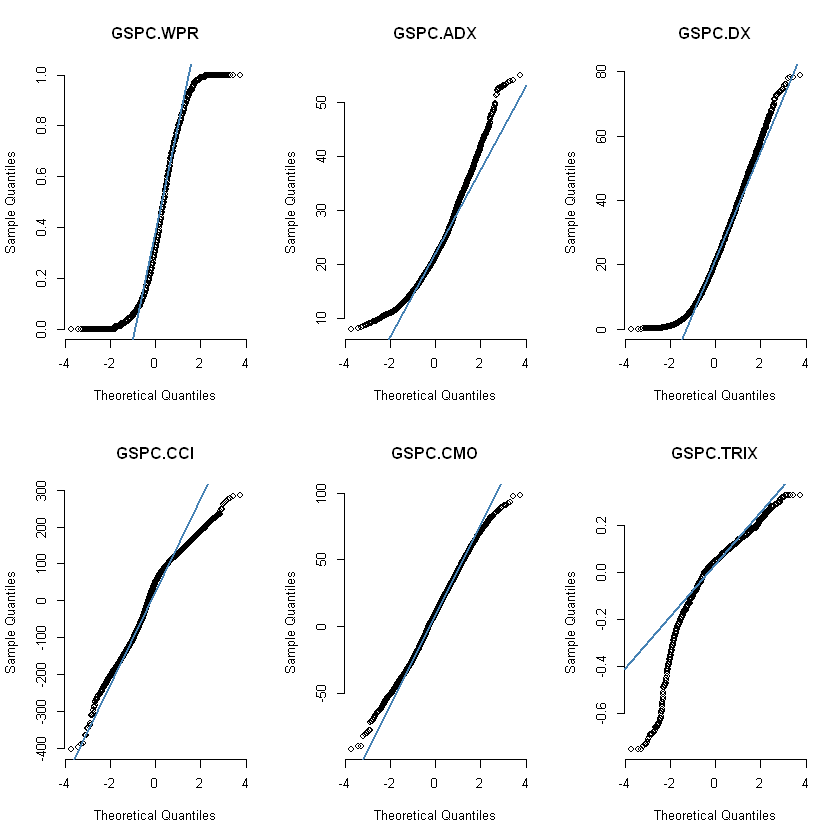

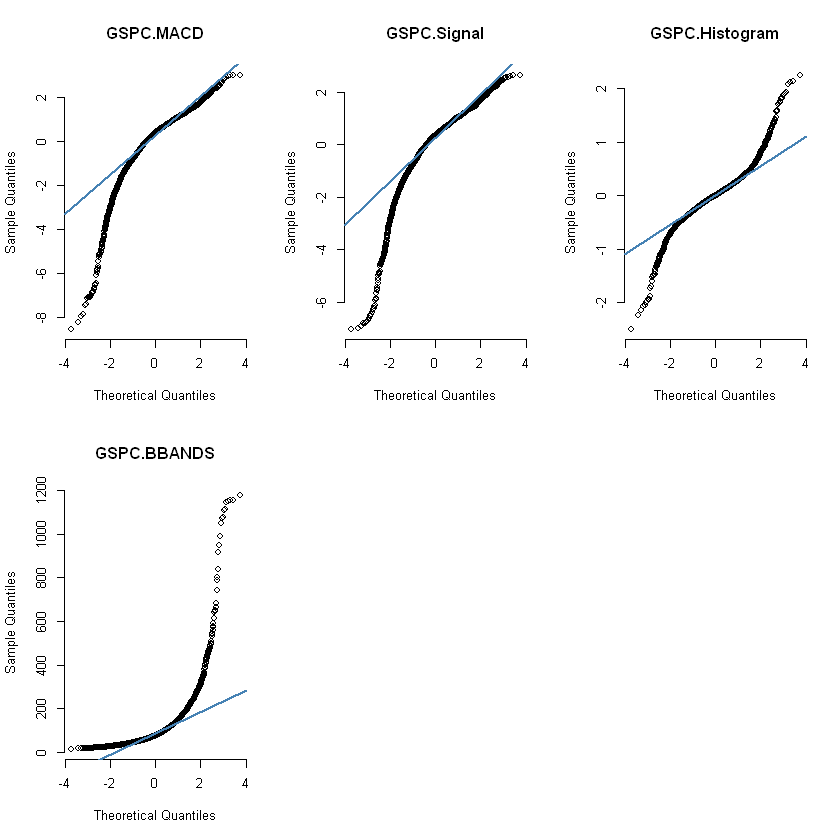

In [30]:
par(mfrow=c(2,3))

for (column in colnames(GSPC.df3)){
    qqnorm(GSPC.df3[,column], pch = 1, frame = FALSE, main = column)
    qqline(GSPC.df3[,column], col = "steelblue", lwd = 2)
}

## 4.6. Análise de correlação

In [31]:
# Package
library(corrplot)

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


In [32]:
# Cálculo das correlações
round(cor(GSPC.df3), digits = 2)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.STD10,GSPC.MOM,GSPC.ROC,GSPC.StochK,...,GSPC.WPR,GSPC.ADX,GSPC.DX,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.BBANDS
GSPC.High,1.00,1.00,1.00,0.02,1.00,1.00,0.39,0.04,0.02,0.17,...,-0.17,-0.07,-0.04,0.15,0.17,0.22,0.19,0.20,0.01,0.41
GSPC.Low,1.00,1.00,1.00,0.02,1.00,1.00,0.38,0.04,0.02,0.18,...,-0.18,-0.08,-0.04,0.16,0.18,0.23,0.20,0.21,0.01,0.40
GSPC.Close,1.00,1.00,1.00,0.03,1.00,1.00,0.38,0.05,0.03,0.18,...,-0.18,-0.08,-0.04,0.15,0.18,0.23,0.20,0.20,0.01,0.40
GSPC.Return,0.02,0.02,0.03,1.00,0.01,0.01,-0.04,0.88,1.00,0.38,...,-0.38,0.00,-0.10,0.25,0.21,-0.01,0.05,0.00,0.16,-0.01
GSPC.SMA,1.00,1.00,1.00,0.01,1.00,1.00,0.40,0.03,0.01,0.14,...,-0.14,-0.07,-0.03,0.12,0.16,0.22,0.18,0.20,-0.02,0.41
GSPC.WMA,1.00,1.00,1.00,0.01,1.00,1.00,0.39,0.03,0.01,0.15,...,-0.15,-0.07,-0.03,0.13,0.17,0.23,0.19,0.20,-0.01,0.41
GSPC.STD10,0.39,0.38,0.38,-0.04,0.40,0.39,1.00,-0.04,-0.04,-0.11,...,0.11,0.25,0.23,-0.17,-0.21,-0.34,-0.42,-0.40,-0.14,0.85
GSPC.MOM,0.04,0.04,0.05,0.88,0.03,0.03,-0.04,1.00,0.88,0.37,...,-0.37,-0.01,-0.09,0.26,0.21,-0.01,0.05,0.00,0.16,-0.01
GSPC.ROC,0.02,0.02,0.03,1.00,0.01,0.01,-0.04,0.88,1.00,0.38,...,-0.38,0.00,-0.10,0.25,0.21,-0.01,0.05,0.00,0.16,-0.01
GSPC.StochK,0.17,0.18,0.18,0.38,0.14,0.15,-0.11,0.37,0.38,1.00,...,-1.00,-0.06,-0.16,0.91,0.81,0.16,0.47,0.28,0.67,-0.03


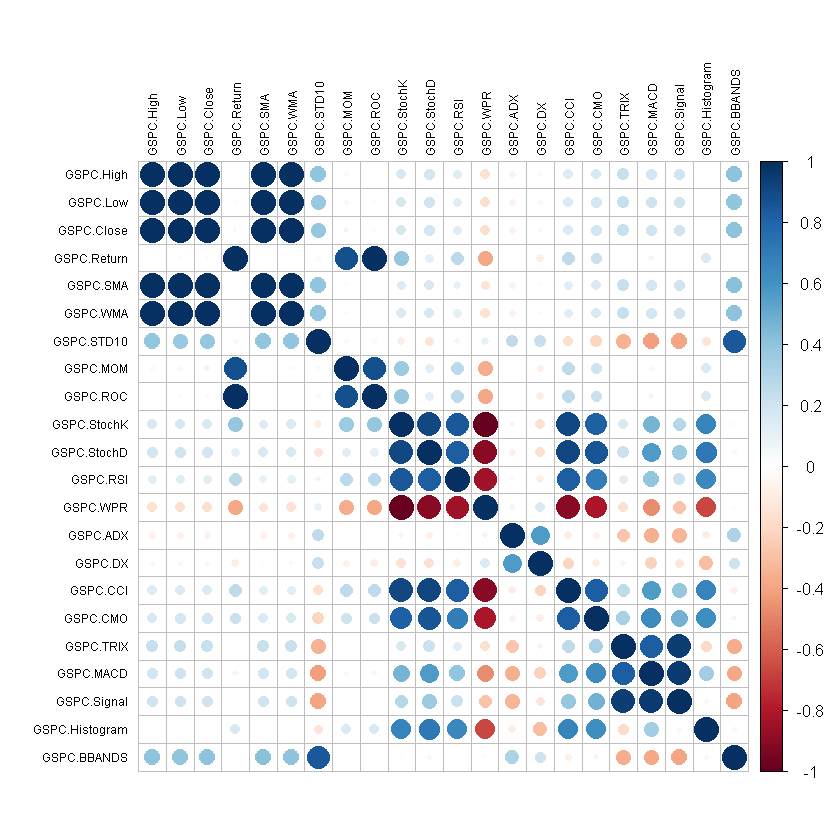

In [33]:
# Matriz de correlação
corrplot(cor(GSPC.df3), method = "circle", tl.col = "black", tl.cex = 0.6, tl.srt=90)

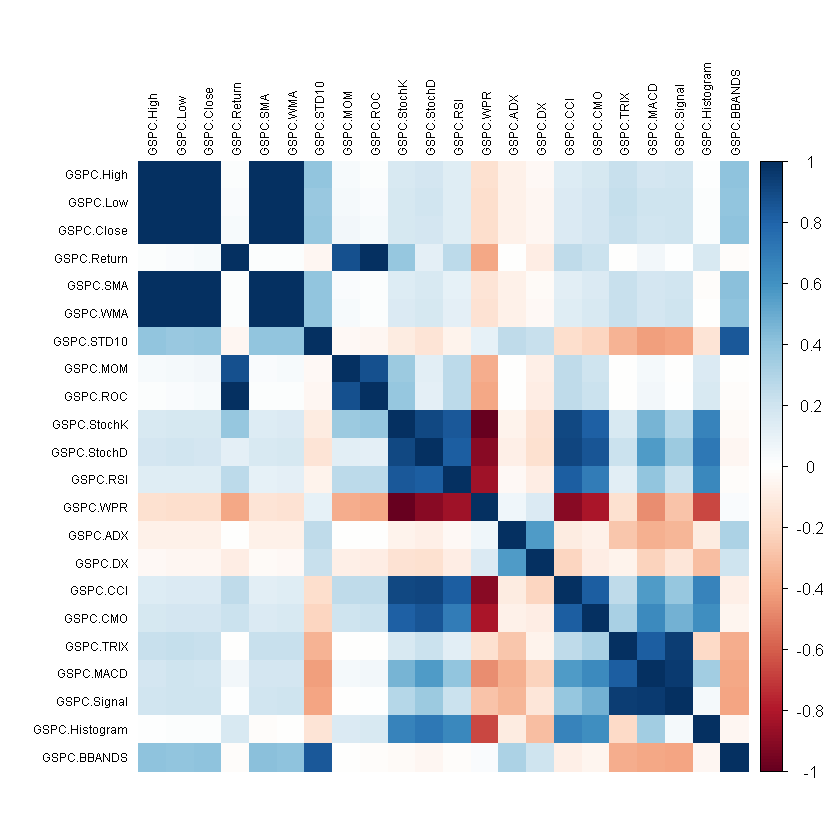

In [34]:
# Matriz de correlação
corrplot(cor(GSPC.df3), method = "color", tl.col = "black", tl.cex = 0.6, tl.srt=90)

# 5. Preprocessamento dos dados

## 5.1. Remoção dos *missing values*

A remoção dos dados ausentes foi realizada na seção anterior (análise exploratória de dados).

## 5.2. Tratamento dos outliers

In [35]:
# Função para substituição dos outliers pelos limietes do boxplot
outlier <- function(x){
    q1 = quantile(x, probs = .25, na.rm = T)
    q3 =  quantile(x, probs = .75, na.rm = T)
    iqr =  q3 - q1 
    li = q1 - 1.5*iqr
    ls = q3 + 1.5*iqr
    
    x[x < li] = li
    x[x > ls] = ls
    
    return (x)    
}

In [36]:
# Remoção dos outliers
GSPC.bp <- GSPC.df3
for (column in colnames(GSPC.df3)){
    GSPC.bp[,column] <- outlier(GSPC.df3[,column])
}

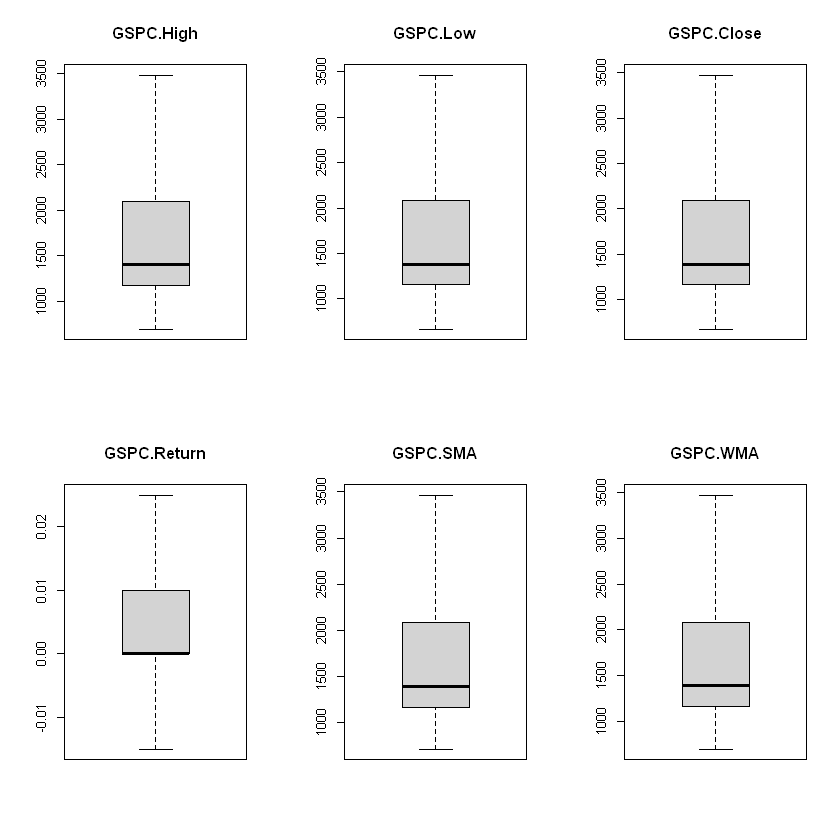

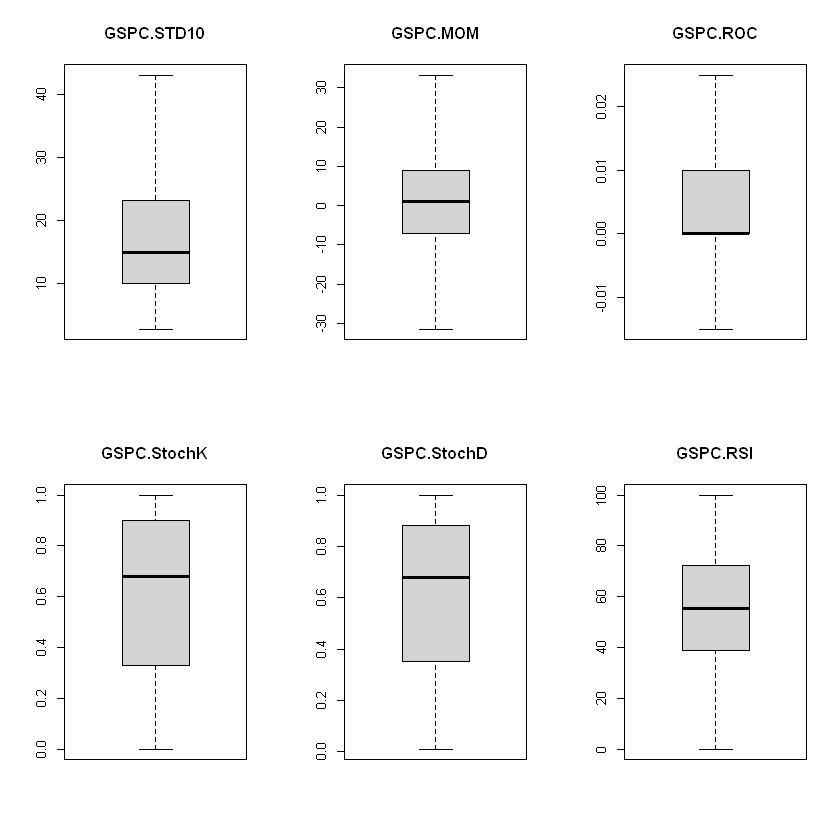

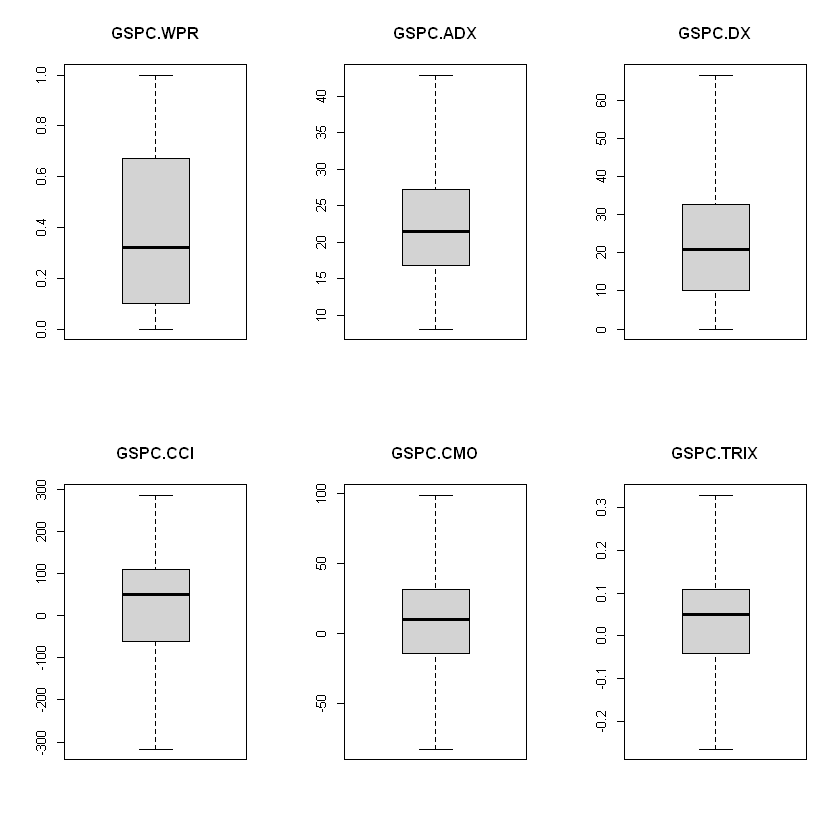

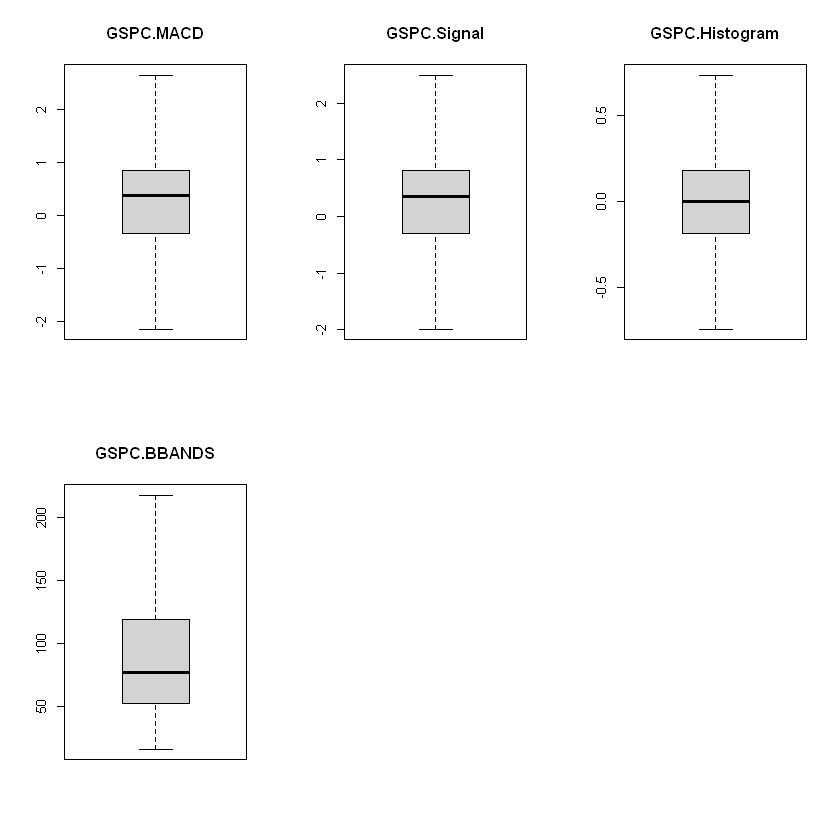

In [37]:
# Boxplot
par(mfrow=c(2, 3))

for (column in colnames(GSPC.bp)){
    boxplot(GSPC.bp[,column], col='light grey', main=column, border='black', horizontal=FALSE)
}

## 5.3. Normalização

**Normalização z-score**

In [38]:
# Função para normalização dos dados
normalize.zscore = function(x) {
    return ((x - mean(x)) / sd(x))
}

In [39]:
# Normalização z-score
GSPC.zscore <- GSPC.bp
for (column in colnames(GSPC.bp)){
    GSPC.zscore[,column] <- normalize.zscore(GSPC.bp[,column])
}

In [40]:
head(GSPC.zscore)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.STD10,GSPC.MOM,GSPC.ROC,GSPC.StochK,...,GSPC.WPR,GSPC.ADX,GSPC.DX,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.BBANDS
59,-0.2184352,-0.2144571,-0.2210663,-0.08218595,-0.2959350,-0.2584701,2.3708513,-0.2994195633,-0.08218595,0.7927663,...,-0.7927663,0.4730663,1.5723741,0.9921892,1.6355797,0.2887396,2.254567,1.253076,2.3919390,2.369456
60,-0.2287879,-0.2307373,-0.2440911,-1.15935082,-0.2746444,-0.2487678,2.3516619,-1.1513100083,-1.15935082,0.5065922,...,-0.5065922,0.5909520,1.0654906,0.7265861,1.2954976,0.5427690,2.275142,1.483224,2.3919390,2.369456
61,-0.2372039,-0.2445405,-0.2429634,-0.08218595,-0.2579673,-0.2427146,0.9397023,-0.0009519613,-0.08218595,0.5065922,...,-0.5065922,0.6414744,0.6474089,0.5766148,1.0776177,0.7121219,2.264855,1.669534,2.2133540,2.369456
62,-0.2429996,-0.2772154,-0.2723689,-1.15935082,-0.2537550,-0.2450472,0.6430960,-1.4552166555,-1.15935082,0.1886209,...,-0.1886209,0.5585658,-0.2607035,0.3401038,0.8354236,0.8814748,2.110539,1.790088,1.3691337,2.369456
63,-0.2395392,-0.2632548,-0.2571524,0.99497892,-0.2488550,-0.2453763,0.3322753,0.6700902328,0.99497892,0.3476065,...,-0.3476065,0.4912026,-0.1978292,0.3669863,1.1069841,0.9661513,2.017950,1.855845,0.8820836,2.369456
64,-0.2575105,-0.2595607,-0.2466035,-0.08218595,-0.2417916,-0.2446751,-0.3831807,0.4477692627,-0.08218595,0.4747950,...,-0.4747950,0.4277257,-0.1978292,0.3101832,1.6188440,1.1355042,1.966512,1.910642,0.5573834,2.369456


**Normalização min-max**

In [41]:
# Função para normalização dos dados
normalize.minmax = function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
}

In [42]:
# Normalização - dados sem outliers
GSPC.minmax <- GSPC.bp
for (column in colnames(GSPC.bp)){
    GSPC.minmax[,column] <- normalize.minmax(GSPC.bp[,column])
}

In [43]:
head(GSPC.minmax)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.STD10,GSPC.MOM,GSPC.ROC,GSPC.StochK,...,GSPC.WPR,GSPC.ADX,GSPC.DX,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.BBANDS
59,0.3010714,0.3043390,0.3027671,0.375,0.2764358,0.2875304,1.0000000,0.4303234,0.375,0.86,...,0.14,0.5240765,0.7047005,0.7414723,0.7921526,0.5462185,0.9437500,0.7399554,1.0000000,1
60,0.2984637,0.3002760,0.2970035,0.125,0.2818233,0.2899793,0.9949705,0.2364206,0.125,0.77,...,0.23,0.5502372,0.5874503,0.6936367,0.7327598,0.5966387,0.9479167,0.7868304,1.0000000,1
61,0.2963438,0.2968312,0.2972858,0.375,0.2860434,0.2915072,0.6248991,0.4982591,0.375,0.77,...,0.23,0.5614489,0.4907414,0.6666266,0.6947087,0.6302521,0.9458333,0.8247768,0.9628378,1
62,0.2948840,0.2886767,0.2899250,0.125,0.2871093,0.2909184,0.5471593,0.1672470,0.125,0.67,...,0.33,0.5430502,0.2806807,0.6240305,0.6524113,0.6638655,0.9145833,0.8493304,0.7871622,1
63,0.2957556,0.2921608,0.2937340,0.625,0.2883493,0.2908353,0.4656939,0.6509981,0.625,0.72,...,0.28,0.5281012,0.2952245,0.6288721,0.6998373,0.6806723,0.8958333,0.8627232,0.6858108,1
64,0.2912289,0.2930827,0.2963746,0.375,0.2901367,0.2910123,0.2781745,0.6003946,0.375,0.76,...,0.24,0.5140147,0.2952245,0.6186418,0.7892299,0.7142857,0.8854167,0.8738839,0.6182432,1


## 5.4. Seleção de atributos

In [44]:
Direction.df <- GSPC.df2[, (names(GSPC.df2) %in% v.direction)]

In [45]:
head(Direction.df)

,GSPC.Direction,GSPC.Trend
59,0,down
60,1,up
61,0,down
62,1,up
63,1,up
64,0,down


### 5.4.1. Classificação e seleção de atributos com base no algoritmo de *random forest*

In [46]:
# Package
library(Boruta)

Warning message:
"package 'Boruta' was built under R version 3.6.3"

**Dados z-score**

In [47]:
# Objeto de armazenamento dos resultados
set.seed(123)
GSPCboruta.zscore.output <- Boruta(Direction.df$GSPC.Trend ~., data = GSPC.zscore, doTrace = 0)
names(GSPCboruta.zscore.output)

[1] "finalDecision" "ImpHistory"    "pValue"        "maxRuns"      
 [5] "light"         "mcAdj"         "timeTaken"     "roughfixed"   
 [9] "call"          "impSource"

In [48]:
# Obtenção das variáveis de significância
GSPCboruta.zscore.signif <- getSelectedAttributes(GSPCboruta.zscore.output, withTentative = TRUE)
print(GSPCboruta.zscore.signif)

[1] "GSPC.MOM"    "GSPC.StochK" "GSPC.RSI"    "GSPC.WPR"    "GSPC.CMO"   


In [49]:
# Correção preliminar
GSPCboruta.zscore.roughfixmod <- TentativeRoughFix(GSPCboruta.zscore.output)
GSPCboruta.zscore.signif2 <- getSelectedAttributes(GSPCboruta.zscore.roughfixmod)
print(GSPCboruta.zscore.signif2)

[1] "GSPC.StochK" "GSPC.RSI"    "GSPC.WPR"   


In [50]:
# Score de importância das variáveis
GSPCboruta.zscore.imp <- attStats(GSPCboruta.zscore.roughfixmod)
GSPCboruta.zscore.imp2 <- GSPCboruta.zscore.imp[GSPCboruta.zscore.imp$decision != 'Rejected', c('meanImp', 'decision')]

# Exibição por ordem decrescente de importância
head(GSPCboruta.zscore.imp2[order(-GSPCboruta.zscore.imp2),])

Warning message in Ops.factor(left):
"'-' not meaningful for factors"

,meanImp,decision
GSPC.StochK,3.133337,Confirmed
GSPC.WPR,3.132167,Confirmed
GSPC.RSI,2.927013,Confirmed
NA,NA,NA
NA.1,NA,NA
NA.2,NA,NA


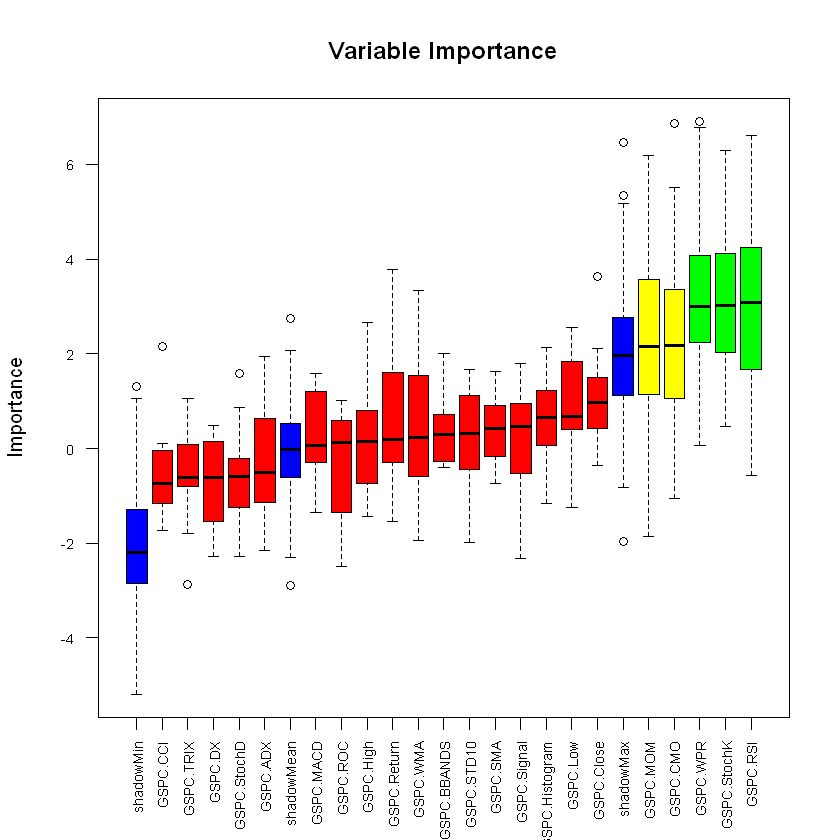

In [51]:
# Análise Gráfica
plot(GSPCboruta.zscore.output, cex.axis = .7, las = 2, xlab = "", main = "Variable Importance")

Somente as variáveis `GSPC.MOM`, `GSPC.RSI`, `GSPC.StochK`, `GSPC.WPR` não foram rejeitadas.

**Dados minmax**

In [52]:
# Objeto de armazenamento dos resultados
set.seed(123)
GSPCboruta.minmax.output <- Boruta(Direction.df$GSPC.Trend ~., data = GSPC.minmax, doTrace = 0)
names(GSPCboruta.minmax.output)

[1] "finalDecision" "ImpHistory"    "pValue"        "maxRuns"      
 [5] "light"         "mcAdj"         "timeTaken"     "roughfixed"   
 [9] "call"          "impSource"

In [53]:
# Obtenção das variáveis de significância
GSPCboruta.minmax.signif <- getSelectedAttributes(GSPCboruta.minmax.output, withTentative = TRUE)
print(GSPCboruta.minmax.signif)

[1] "GSPC.MOM"    "GSPC.StochK" "GSPC.RSI"    "GSPC.WPR"   


In [54]:
# Correção preliminar
GSPCboruta.minmax.roughfixmod <- TentativeRoughFix(GSPCboruta.minmax.output)
GSPCboruta.minmax.signif2 <- getSelectedAttributes(GSPCboruta.minmax.roughfixmod)
print(GSPCboruta.minmax.signif2)

[1] "GSPC.RSI"


In [55]:
# Score de importância das variáveis
GSPCboruta.minmax.imp <- attStats(GSPCboruta.minmax.roughfixmod)
GSPCboruta.minmax.imp2 <- GSPCboruta.zscore.imp[GSPCboruta.minmax.imp$decision != 'Rejected', c('meanImp', 'decision')]

# Exibição por ordem decrescente de importância
head(GSPCboruta.minmax.imp2[order(-GSPCboruta.minmax.imp2),])

Warning message in Ops.factor(left):
"'-' not meaningful for factors"

,meanImp,decision
GSPC.RSI,2.927013,Confirmed
NA,NA,NA


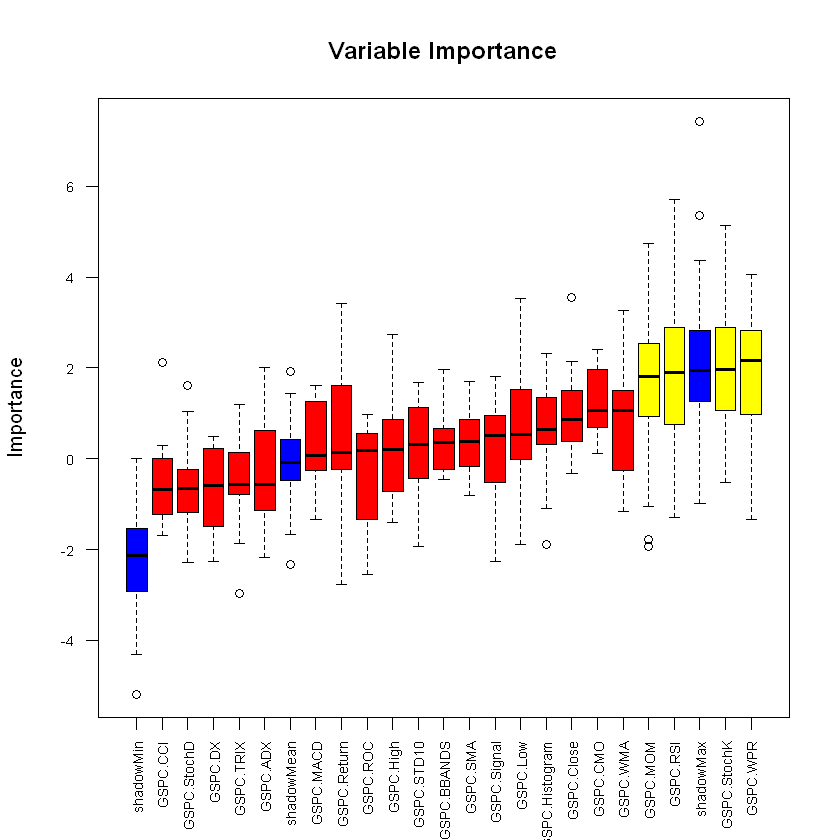

In [56]:
# Análise Gráfica
plot(GSPCboruta.minmax.output, cex.axis = .7, las = 2, xlab = "", main = "Variable Importance")

Somente as variáveis `GSPC.CMO`, `GSPC.MOM`, `GSPC.RSI`, `GSPC.StochK`, `GSPC.WPR` não foram rejeitadas.

### 5.4.2. Classificação e seleção de atributos com base no algoritmo *Recursive Feature Elimination* (RFE)

In [57]:
# Package
library(caret)
library(e1071)
library(ggplot2)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'e1071' was built under R version 3.6.3"

In [58]:
# Definição do controle por meio de uma função de seleção random forest
control <- rfeControl(functions = rfFuncs, method = "cv", number = 10)

**Dados z-score**

In [59]:
GSPCrfe.zscore.output <- rfe(Direction.df$GSPC.Trend~., GSPC.zscore, rfeControl = control)

In [60]:
# Resultado da seleção
print(GSPCrfe.zscore.output)


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables Accuracy     Kappa AccuracySD KappaSD Selected
         4   0.4937 -0.024231    0.02062 0.04054         
         8   0.5095  0.001643    0.01960 0.03976         
        16   0.5267  0.035091    0.02119 0.04212        *
        22   0.5239  0.027575    0.01837 0.03558         

The top 5 variables (out of 16):
   GSPC.RSI, GSPC.StochK, GSPC.BBANDS, GSPC.WPR, GSPC.STD10



In [61]:
# Lista dos atributos escolhidos (de acordo com a variável de interesse)
predictors(GSPCrfe.zscore.output)

[1] "GSPC.RSI"       "GSPC.StochK"    "GSPC.BBANDS"    "GSPC.WPR"      
 [5] "GSPC.STD10"     "GSPC.MOM"       "GSPC.CMO"       "GSPC.TRIX"     
 [9] "GSPC.WMA"       "GSPC.Histogram" "GSPC.Close"     "GSPC.SMA"      
[13] "GSPC.Low"       "GSPC.ROC"       "GSPC.High"      "GSPC.StochD"

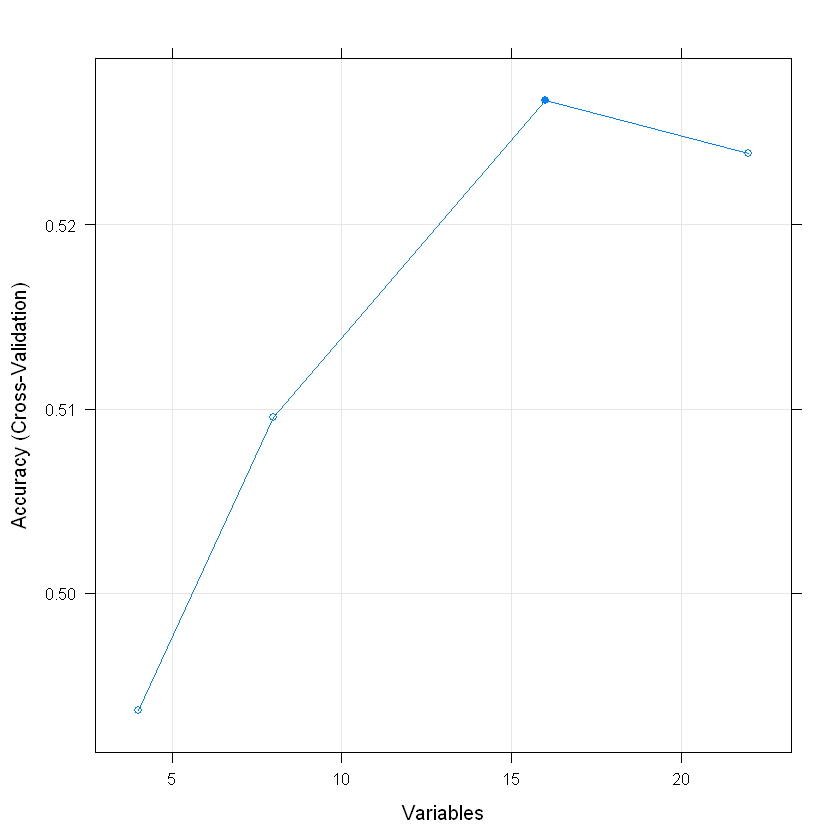

In [62]:
plot(GSPCrfe.zscore.output, type=c("g", "o"))

Somente 6 *features* foram desconsideradas.

**Dados minmax**

In [63]:
GSPCrfe.minmax.output <- rfe(Direction.df$GSPC.Trend~., GSPC.minmax, rfeControl = control)

In [64]:
# Resultado da seleção
print(GSPCrfe.minmax.output)


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables Accuracy     Kappa AccuracySD KappaSD Selected
         4   0.5003 -0.012517    0.02091 0.03989         
         8   0.5062 -0.006731    0.02077 0.04205         
        16   0.5190  0.020164    0.01781 0.03648         
        22   0.5218  0.023513    0.01868 0.03719        *

The top 5 variables (out of 22):
   GSPC.CMO, GSPC.WPR, GSPC.RSI, GSPC.Histogram, GSPC.STD10



In [65]:
# Lista dos atributos escolhidos (de acordo com a variável de interesse)
predictors(GSPCrfe.minmax.output)

[1] "GSPC.CMO"       "GSPC.WPR"       "GSPC.RSI"       "GSPC.Histogram"
 [5] "GSPC.STD10"     "GSPC.MOM"       "GSPC.BBANDS"    "GSPC.StochK"   
 [9] "GSPC.Close"     "GSPC.Signal"    "GSPC.ADX"       "GSPC.WMA"      
[13] "GSPC.SMA"       "GSPC.High"      "GSPC.Low"       "GSPC.TRIX"     
[17] "GSPC.Return"    "GSPC.ROC"       "GSPC.StochD"    "GSPC.MACD"     
[21] "GSPC.CCI"       "GSPC.DX"

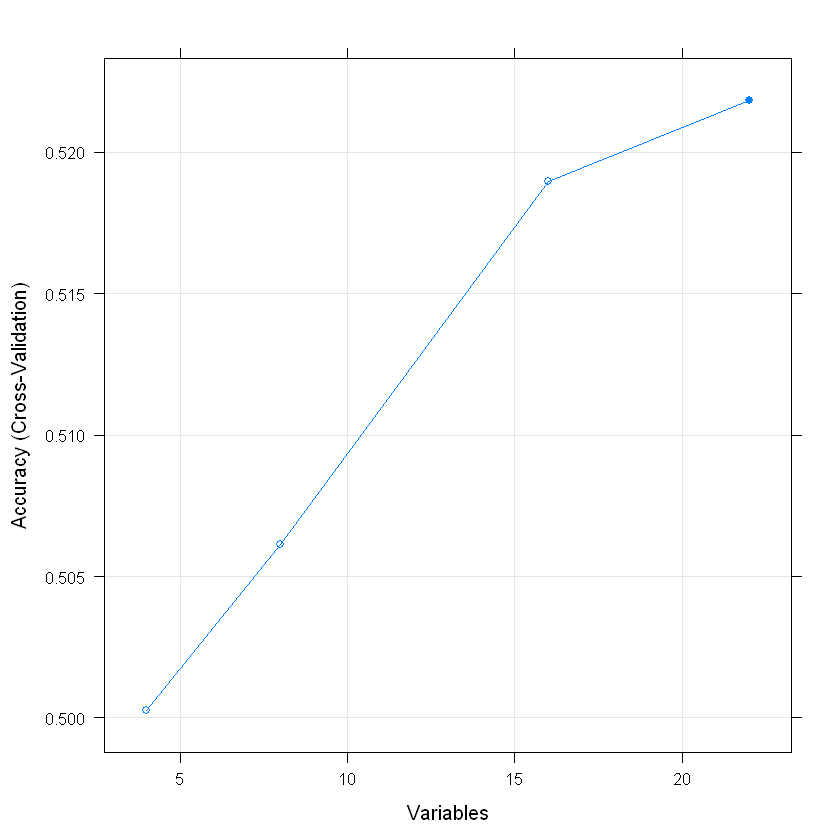

In [66]:
plot(GSPCrfe.minmax.output, type=c("g", "o"))

Todas as *features* foram consideradas

### 5.4.3. Seleção de atributos utilizando Análise de Componentes Principais (PCA)

**Dados z-score**

In [67]:
# Magnitude completa (variância completa)
GSPC.zscore.pca <- prcomp(x = GSPC.zscore, center = TRUE, scale. = TRUE)
summary(GSPC.zscore.pca)

# PCA com maior proporção de variância: PCA1 (35.33%)

Importance of components:
                          PC1    PC2    PC3    PC4    PC5     PC6     PC7
Standard deviation     2.7424 2.2807 1.8066 1.4988 1.2294 0.81345 0.66047
Proportion of Variance 0.3418 0.2364 0.1484 0.1021 0.0687 0.03008 0.01983
Cumulative Proportion  0.3418 0.5783 0.7266 0.8287 0.8974 0.92752 0.94735
                           PC8    PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.58503 0.4713 0.42144 0.34619 0.34292 0.30469 0.20794
Proportion of Variance 0.01556 0.0101 0.00807 0.00545 0.00535 0.00422 0.00197
Cumulative Proportion  0.96291 0.9730 0.98108 0.98653 0.99187 0.99609 0.99806
                          PC15    PC16    PC17    PC18    PC19     PC20
Standard deviation     0.19098 0.07408 0.02461 0.01025 0.00691 0.003916
Proportion of Variance 0.00166 0.00025 0.00003 0.00000 0.00000 0.000000
Cumulative Proportion  0.99972 0.99996 0.99999 1.00000 1.00000 1.000000
                            PC21      PC22
Standard deviation     1.721e-16 5.

A função `prcomp` fornece 4 outputs:

* Sdev: definição do desvio padrão dos pontos projetados sobre os PCAs (diminui do PCA1 até o PCA18)

* Rotation: definição dos eixos dos componentes principais. `Rotation` é a matriz *rotation*, que fornece os pesos utilizados para projetar os pontos originais para as 2 novas direções.

* Center: média das features de input no espaço de features originais (sem qualquer transformação).

* Scale: desvio padrão das features de input no espaço de features originais (sem qualquer transformação).

In [68]:
print('Sdev')
round(GSPC.zscore.pca$sdev, 4)

[1] "Sdev"


[1] 2.7424 2.2807 1.8066 1.4988 1.2294 0.8134 0.6605 0.5850 0.4713 0.4214
[11] 0.3462 0.3429 0.3047 0.2079 0.1910 0.0741 0.0246 0.0103 0.0069 0.0039
[21] 0.0000 0.0000

In [69]:
print('Rotation')
round(GSPC.zscore.pca$rotation, 4)

[1] "Rotation"


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
GSPC.High,0.1858,0.3712,-0.0282,-0.0347,0.0574,0.1392,-0.0045,-0.0156,0.0374,-0.0090,...,-0.0092,0.0074,-0.0006,0.0033,0.1839,-0.7570,-0.4405,-0.0119,0.0000,0.0000
GSPC.Low,0.1888,0.3683,-0.0317,-0.0365,0.0591,0.1464,-0.0025,-0.0169,0.0398,-0.0068,...,-0.0084,0.0085,-0.0118,-0.0105,0.5271,0.6103,-0.3774,0.0799,0.0000,0.0000
GSPC.Close,0.1886,0.3688,-0.0262,-0.0395,0.0580,0.1430,-0.0038,-0.0169,0.0382,-0.0070,...,-0.0033,0.0063,-0.0035,-0.0067,0.3392,-0.1291,0.8134,0.0838,0.0000,0.0000
GSPC.Return,0.1207,-0.0757,0.3763,-0.4084,-0.0246,-0.0328,-0.0366,-0.0685,0.0860,-0.0207,...,-0.0656,-0.0138,0.0043,-0.0033,0.0027,0.0019,-0.0008,0.0002,-0.0638,-0.7042
GSPC.SMA,0.1786,0.3758,-0.0322,-0.0408,0.0523,0.1428,-0.0029,-0.0258,0.0254,-0.0128,...,-0.0017,0.0111,0.0334,0.0149,-0.6295,0.1175,-0.0283,0.6222,0.0000,0.0000
GSPC.WMA,0.1815,0.3739,-0.0324,-0.0383,0.0541,0.1421,-0.0031,-0.0247,0.0337,-0.0104,...,0.0002,0.0063,0.0231,0.0023,-0.4179,0.1551,0.0331,-0.7741,0.0000,0.0000
GSPC.STD10,-0.0091,0.2712,0.2525,0.1778,-0.0529,-0.5844,0.2093,0.3032,0.1827,-0.4434,...,0.0071,0.0046,0.0088,0.0042,0.0021,0.0046,0.0007,0.0002,0.0000,0.0000
GSPC.MOM,0.1408,-0.0608,0.3512,-0.3945,-0.0197,0.0063,0.0026,-0.0088,0.0000,0.0471,...,0.0707,-0.1989,0.0421,0.0039,-0.0097,-0.0018,-0.0065,-0.0013,0.0000,0.0000
GSPC.ROC,0.1207,-0.0757,0.3763,-0.4084,-0.0246,-0.0328,-0.0366,-0.0685,0.0860,-0.0207,...,-0.0656,-0.0138,0.0043,-0.0033,0.0027,0.0019,-0.0008,0.0002,0.0638,0.7042
GSPC.StochK,0.3227,-0.1393,0.1156,0.0961,-0.0064,0.0657,0.0907,0.1130,-0.3001,-0.1785,...,0.3042,0.3065,-0.0251,-0.0023,-0.0010,-0.0005,-0.0012,-0.0013,-0.7042,0.0638


In [70]:
print('Center')
round(GSPC.zscore.pca$center, 4)

[1] "Center"


GSPC.High       GSPC.Low     GSPC.Close    GSPC.Return       GSPC.SMA 
             0              0              0              0              0 
      GSPC.WMA     GSPC.STD10       GSPC.MOM       GSPC.ROC    GSPC.StochK 
             0              0              0              0              0 
   GSPC.StochD       GSPC.RSI       GSPC.WPR       GSPC.ADX        GSPC.DX 
             0              0              0              0              0 
      GSPC.CCI       GSPC.CMO      GSPC.TRIX      GSPC.MACD    GSPC.Signal 
             0              0              0              0              0 
GSPC.Histogram    GSPC.BBANDS 
             0              0

In [71]:
print('Scale')
round(GSPC.zscore.pca$scale, 4)

[1] "Scale"


GSPC.High       GSPC.Low     GSPC.Close    GSPC.Return       GSPC.SMA 
             1              1              1              1              1 
      GSPC.WMA     GSPC.STD10       GSPC.MOM       GSPC.ROC    GSPC.StochK 
             1              1              1              1              1 
   GSPC.StochD       GSPC.RSI       GSPC.WPR       GSPC.ADX        GSPC.DX 
             1              1              1              1              1 
      GSPC.CCI       GSPC.CMO      GSPC.TRIX      GSPC.MACD    GSPC.Signal 
             1              1              1              1              1 
GSPC.Histogram    GSPC.BBANDS 
             1              1

In [72]:
# scores para as dimensões
head(round(GSPC.zscore.pca$x, 4))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
59,3.1233,-0.4944,0.5184,2.4328,-2.2458,-3.2672,0.1883,-0.8863,1.3292,0.0899,...,-0.0379,0.3848,-0.0254,-0.2229,0.0333,0.0044,-0.0004,-0.0029,0,0
60,2.2329,-0.0587,-0.9181,3.2006,-1.9765,-3.4355,-0.3335,-0.6662,1.2011,-0.1675,...,0.1270,0.4798,-0.2031,-0.1324,0.0022,0.0081,-0.0009,0.0002,0,0
61,2.6396,-0.6496,-0.1968,1.4081,-1.8360,-2.7741,-0.8396,-0.7830,1.1598,0.7238,...,0.2057,0.3073,-0.1035,-0.0412,-0.0274,0.0057,-0.0019,0.0031,0,0
62,1.2256,-0.0667,-2.0494,1.9691,-1.2698,-2.8232,-1.6109,-0.6615,0.1020,0.1927,...,0.1577,0.4377,-0.1024,-0.0170,-0.0231,-0.0087,0.0007,-0.0015,0,0
63,2.1501,-0.6011,0.1880,-0.8084,-1.5674,-2.7178,-1.6419,-0.9717,0.0022,0.4425,...,0.0403,0.1022,0.0682,0.0171,-0.0125,-0.0026,-0.0116,-0.0009,0,0
64,1.8283,-0.5642,-1.0646,-0.1962,-1.6022,-2.2849,-1.9051,-1.4338,-0.9222,0.3475,...,0.2504,0.1879,-0.0856,0.0017,-0.0076,0.0034,0.0057,0.0011,0,0


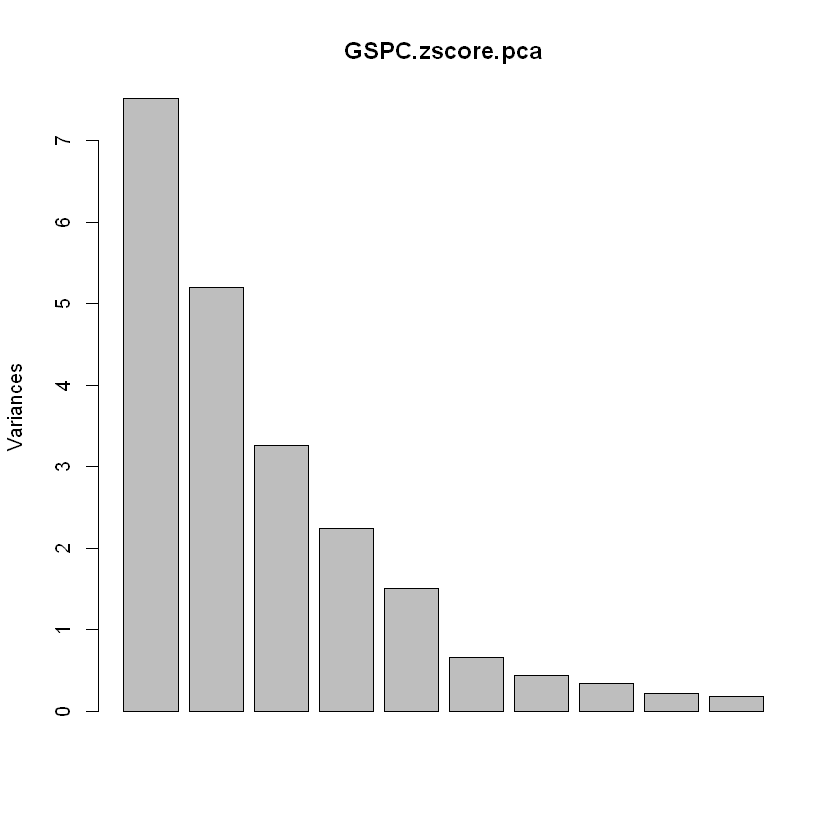

In [73]:
# gráfico da dominância dos PCAs
plot(GSPC.zscore.pca)

In [74]:
# Visualização dos dados na nova dimensão reduzida
GSPC.zscore.pcar <- princomp(GSPC.zscore)
loadings(GSPC.zscore.pcar)


Loadings:
               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
GSPC.High       0.186  0.371                       0.139                     
GSPC.Low        0.189  0.368                       0.146                     
GSPC.Close      0.189  0.369                       0.143                     
GSPC.Return     0.121        -0.376  0.408                                   
GSPC.SMA        0.179  0.376                       0.143                     
GSPC.WMA        0.182  0.374                       0.142                     
GSPC.STD10             0.271 -0.253 -0.178        -0.584 -0.209 -0.303  0.183
GSPC.MOM        0.141        -0.351  0.394                                   
GSPC.ROC        0.121        -0.376  0.408                                   
GSPC.StochK     0.323 -0.139 -0.116                             -0.113 -0.300
GSPC.StochD     0.315 -0.126        -0.234                             -0.133
GSPC.RSI        0.285 -0.128        -0.168           

In [75]:
# Valores das novas features para os primeiros 5 casos
GSPC.zscore.pcar$scores[1:5,]

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,...,Comp.13,Comp.14,Comp.15,Comp.16,Comp.17,Comp.18,Comp.19,Comp.20,Comp.21,Comp.22
59,3.123260,-0.49438021,-0.5184248,-2.4328187,-2.245843,-3.267164,-0.1882749,0.8863275,1.329195397,-0.08990862,...,0.03789865,0.3847700,0.02542891,-0.22289110,0.033328613,-0.004404000,0.0004226500,0.0028847078,-3.122216e-15,1.840703e-14
60,2.232904,-0.05874605,0.9181155,-3.2005576,-1.976459,-3.435523,0.3334749,0.6662084,1.201096587,0.16748443,...,-0.12703165,0.4797545,0.20307110,-0.13235726,0.002166687,-0.008108444,0.0009371671,-0.0002304252,1.385695e-14,-6.298858e-15
61,2.639576,-0.64955032,0.1968037,-1.4080655,-1.836028,-2.774055,0.8396117,0.7829906,1.159842617,-0.72379551,...,-0.20565656,0.3072651,0.10347171,-0.04120852,-0.027363326,-0.005737594,0.0018977689,-0.0030589570,2.722195e-14,-2.693605e-14
62,1.225554,-0.06667663,2.0494053,-1.9691163,-1.269751,-2.823173,1.6108996,0.6614932,0.102040277,-0.19274564,...,-0.15768426,0.4376654,0.10240198,-0.01698234,-0.023079008,0.008666737,-0.0006926772,0.0014960569,-1.172561e-14,2.090489e-14
63,2.150056,-0.60107765,-0.1879838,0.8083945,-1.567370,-2.717787,1.6418679,0.9717070,0.002169231,-0.44247668,...,-0.04025708,0.1022142,-0.06816662,0.01710128,-0.012537785,0.002598010,0.0115825413,0.0008917631,6.117851e-14,4.628120e-15


No PCA1 os atributos `GSPC.STD10`, `GSPC.ADX`, `GSPC.DX`, `GSPC.BBANDS` foram desconsiderados.

**Dados minmax**

In [76]:
# Magnitude completa (variância completa)
GSPC.minmax.pca <- prcomp(x = GSPC.minmax, center = TRUE, scale. = TRUE)
summary(GSPC.minmax.pca)

# PCA com maior proporção de variância: PCA1 (35.33%)

Importance of components:
                          PC1    PC2    PC3    PC4    PC5     PC6     PC7
Standard deviation     2.7424 2.2807 1.8066 1.4988 1.2294 0.81345 0.66047
Proportion of Variance 0.3418 0.2364 0.1484 0.1021 0.0687 0.03008 0.01983
Cumulative Proportion  0.3418 0.5783 0.7266 0.8287 0.8974 0.92752 0.94735
                           PC8    PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.58503 0.4713 0.42144 0.34619 0.34292 0.30469 0.20794
Proportion of Variance 0.01556 0.0101 0.00807 0.00545 0.00535 0.00422 0.00197
Cumulative Proportion  0.96291 0.9730 0.98108 0.98653 0.99187 0.99609 0.99806
                          PC15    PC16    PC17    PC18    PC19     PC20
Standard deviation     0.19098 0.07408 0.02461 0.01025 0.00691 0.003916
Proportion of Variance 0.00166 0.00025 0.00003 0.00000 0.00000 0.000000
Cumulative Proportion  0.99972 0.99996 0.99999 1.00000 1.00000 1.000000
                            PC21      PC22
Standard deviation     1.464e-16 1.

In [77]:
print('Sdev')
round(GSPC.minmax.pca$sdev, 4)

[1] "Sdev"


[1] 2.7424 2.2807 1.8066 1.4988 1.2294 0.8134 0.6605 0.5850 0.4713 0.4214
[11] 0.3462 0.3429 0.3047 0.2079 0.1910 0.0741 0.0246 0.0103 0.0069 0.0039
[21] 0.0000 0.0000

In [78]:
print('Rotation')
round(GSPC.minmax.pca$rotation, 4)

[1] "Rotation"


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
GSPC.High,0.1858,0.3712,-0.0282,-0.0347,0.0574,0.1392,-0.0045,-0.0156,0.0374,-0.0090,...,-0.0092,0.0074,-0.0006,0.0033,0.1839,-0.7570,-0.4405,-0.0119,0.0000,0.0000
GSPC.Low,0.1888,0.3683,-0.0317,-0.0365,0.0591,0.1464,-0.0025,-0.0169,0.0398,-0.0068,...,-0.0084,0.0085,-0.0118,-0.0105,0.5271,0.6103,-0.3774,0.0799,0.0000,0.0000
GSPC.Close,0.1886,0.3688,-0.0262,-0.0395,0.0580,0.1430,-0.0038,-0.0169,0.0382,-0.0070,...,-0.0033,0.0063,-0.0035,-0.0067,0.3392,-0.1291,0.8134,0.0838,0.0000,0.0000
GSPC.Return,0.1207,-0.0757,0.3763,-0.4084,-0.0246,-0.0328,-0.0366,-0.0685,0.0860,-0.0207,...,-0.0656,-0.0138,0.0043,-0.0033,0.0027,0.0019,-0.0008,0.0002,0.7029,-0.0768
GSPC.SMA,0.1786,0.3758,-0.0322,-0.0408,0.0523,0.1428,-0.0029,-0.0258,0.0254,-0.0128,...,-0.0017,0.0111,0.0334,0.0149,-0.6295,0.1175,-0.0283,0.6222,0.0000,0.0000
GSPC.WMA,0.1815,0.3739,-0.0324,-0.0383,0.0541,0.1421,-0.0031,-0.0247,0.0337,-0.0104,...,0.0002,0.0063,0.0231,0.0023,-0.4179,0.1551,0.0331,-0.7741,0.0000,0.0000
GSPC.STD10,-0.0091,0.2712,0.2525,0.1778,-0.0529,-0.5844,0.2093,0.3032,0.1827,-0.4434,...,0.0071,0.0046,0.0088,0.0042,0.0021,0.0046,0.0007,0.0002,0.0000,0.0000
GSPC.MOM,0.1408,-0.0608,0.3512,-0.3945,-0.0197,0.0063,0.0026,-0.0088,0.0000,0.0471,...,0.0707,-0.1989,0.0421,0.0039,-0.0097,-0.0018,-0.0065,-0.0013,0.0000,0.0000
GSPC.ROC,0.1207,-0.0757,0.3763,-0.4084,-0.0246,-0.0328,-0.0366,-0.0685,0.0860,-0.0207,...,-0.0656,-0.0138,0.0043,-0.0033,0.0027,0.0019,-0.0008,0.0002,-0.7029,0.0768
GSPC.StochK,0.3227,-0.1393,0.1156,0.0961,-0.0064,0.0657,0.0907,0.1130,-0.3001,-0.1785,...,0.3042,0.3065,-0.0251,-0.0023,-0.0010,-0.0005,-0.0012,-0.0013,0.0768,0.7029


In [79]:
print('Center')
round(GSPC.minmax.pca$center, 4)

[1] "Center"


GSPC.High       GSPC.Low     GSPC.Close    GSPC.Return       GSPC.SMA 
        0.3561         0.3579         0.3581         0.3941         0.3513 
      GSPC.WMA     GSPC.STD10       GSPC.MOM       GSPC.ROC    GSPC.StochK 
        0.3528         0.3786         0.4985         0.3941         0.6107 
   GSPC.StochD       GSPC.RSI       GSPC.WPR       GSPC.ADX        GSPC.DX 
        0.6067         0.5502         0.3893         0.4191         0.3410 
      GSPC.CCI       GSPC.CMO      GSPC.TRIX      GSPC.MACD    GSPC.Signal 
        0.5628         0.5065         0.4889         0.4872         0.4847 
GSPC.Histogram    GSPC.BBANDS 
        0.5023         0.3798

In [80]:
print('Scale')
round(GSPC.minmax.pca$scale, 4)

[1] "Scale"


GSPC.High       GSPC.Low     GSPC.Close    GSPC.Return       GSPC.SMA 
        0.2519         0.2496         0.2503         0.2321         0.2530 
      GSPC.WMA     GSPC.STD10       GSPC.MOM       GSPC.ROC    GSPC.StochK 
        0.2524         0.2621         0.2276         0.2321         0.3145 
   GSPC.StochD       GSPC.RSI       GSPC.WPR       GSPC.ADX        GSPC.DX 
        0.2936         0.2254         0.3145         0.2219         0.2313 
      GSPC.CCI       GSPC.CMO      GSPC.TRIX      GSPC.MACD    GSPC.Signal 
        0.1801         0.1746         0.1985         0.2025         0.2037 
GSPC.Histogram    GSPC.BBANDS 
        0.2081         0.2618

In [81]:
# scores para as dimensões
head(round(GSPC.minmax.pca$x, 4))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
59,3.1233,-0.4944,0.5184,2.4328,-2.2458,-3.2672,0.1883,-0.8863,1.3292,0.0899,...,-0.0379,0.3848,-0.0254,-0.2229,0.0333,0.0044,-0.0004,-0.0029,0,0
60,2.2329,-0.0587,-0.9181,3.2006,-1.9765,-3.4355,-0.3335,-0.6662,1.2011,-0.1675,...,0.1270,0.4798,-0.2031,-0.1324,0.0022,0.0081,-0.0009,0.0002,0,0
61,2.6396,-0.6496,-0.1968,1.4081,-1.8360,-2.7741,-0.8396,-0.7830,1.1598,0.7238,...,0.2057,0.3073,-0.1035,-0.0412,-0.0274,0.0057,-0.0019,0.0031,0,0
62,1.2256,-0.0667,-2.0494,1.9691,-1.2698,-2.8232,-1.6109,-0.6615,0.1020,0.1927,...,0.1577,0.4377,-0.1024,-0.0170,-0.0231,-0.0087,0.0007,-0.0015,0,0
63,2.1501,-0.6011,0.1880,-0.8084,-1.5674,-2.7178,-1.6419,-0.9717,0.0022,0.4425,...,0.0403,0.1022,0.0682,0.0171,-0.0125,-0.0026,-0.0116,-0.0009,0,0
64,1.8283,-0.5642,-1.0646,-0.1962,-1.6022,-2.2849,-1.9051,-1.4338,-0.9222,0.3475,...,0.2504,0.1879,-0.0856,0.0017,-0.0076,0.0034,0.0057,0.0011,0,0


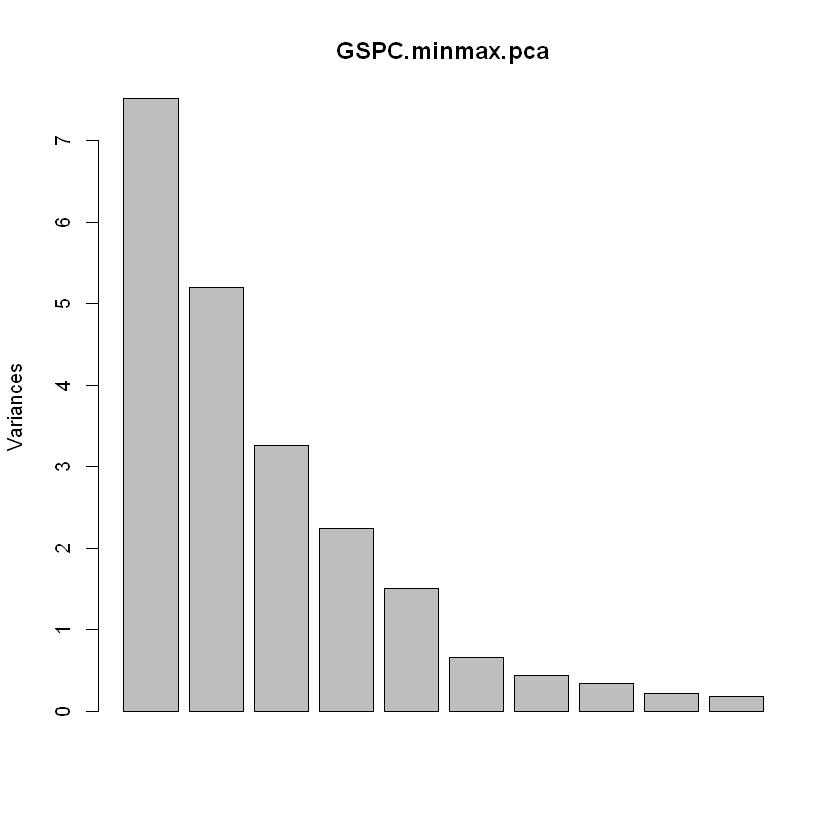

In [82]:
# gráfico da dominância dos PCAs
plot(GSPC.minmax.pca)

In [83]:
# Visualização dos dados na nova dimensão reduzida
GSPC.minmax.pcar <- princomp(GSPC.minmax)
loadings(GSPC.minmax.pcar)


Loadings:
               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
GSPC.High       0.195  0.364                       0.135                     
GSPC.Low        0.196  0.357                       0.139                     
GSPC.Close      0.196  0.359                       0.137                     
GSPC.Return     0.120        -0.391  0.392                              0.106
GSPC.SMA        0.188  0.370                       0.139                     
GSPC.WMA        0.191  0.367                       0.137                     
GSPC.STD10             0.282 -0.311 -0.258        -0.530 -0.304 -0.426  0.161
GSPC.MOM        0.135        -0.353  0.375                                   
GSPC.ROC        0.120        -0.391  0.392                              0.106
GSPC.StochK     0.418 -0.193                                           -0.356
GSPC.StochD     0.374 -0.162  0.102 -0.255                                   
GSPC.RSI        0.263 -0.125        -0.139           

In [84]:
# Valores das novas features para os primeiros 5 casos
GSPC.minmax.pcar$scores[1:5,]

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,...,Comp.13,Comp.14,Comp.15,Comp.16,Comp.17,Comp.18,Comp.19,Comp.20,Comp.21,Comp.22
59,0.6781922,-0.06472963,-0.22396986,-0.68705160,-0.4191800,-0.7525802,-0.04088349,0.1760759,0.323048535,0.030250187,...,-0.088559720,0.06833035,-0.0127521959,-0.045302354,0.0083069541,-0.0011125019,0.0001115686,7.272979e-04,1.869998e-16,-1.609515e-15
60,0.4487705,0.04725327,0.09397325,-0.85689505,-0.3530002,-0.7934504,0.06665756,0.1174213,0.262057003,0.087824982,...,-0.114054211,0.07496490,0.0183055868,-0.026830723,0.0004774609,-0.0020316460,0.0002446795,-5.884356e-05,4.240978e-15,4.396721e-17
61,0.5319079,-0.10617837,-0.05572740,-0.42215106,-0.3636161,-0.6471775,0.23213197,0.2171923,0.254275993,-0.115152818,...,-0.062260293,0.02584384,0.0031852859,-0.008282168,-0.0069133689,-0.0014252129,0.0004826369,-7.723947e-04,7.193167e-15,1.387691e-15
62,0.1929483,0.03171971,0.35189630,-0.54481874,-0.2369171,-0.6682748,0.39683909,0.1790062,-0.007901699,0.002289277,...,-0.077136884,0.06645174,-0.0004383021,-0.003291236,-0.0057910768,0.0021812157,-0.0001839397,3.784715e-04,-2.789888e-15,-2.148452e-15
63,0.4101494,-0.10086986,-0.18313936,0.06866073,-0.3366705,-0.6583310,0.41870404,0.2568952,0.005910136,-0.043121970,...,-0.003936939,0.01067343,-0.0209646996,0.003539090,-0.0031356315,0.0006853169,0.0028981944,2.263847e-04,2.249739e-14,-5.104793e-16


No PCA1 os atributos `GSPC.STD10`, `GSPC.ADX`, `GSPC.DX`, `GSPC.TRIX`, `GSPC.BBANDS` foram desconsiderados.

# 6. Separação dos dados de treino e de teste

In [85]:
# Biblioteca(s) Necessária(s)
library(keras)

Warning message:
"package 'keras' was built under R version 3.6.3"

## 6.1. Amostra pós seleção de atributos

**Dados z-score**

In [86]:
# Nova amostra a partir da seleção de atributos (considerando todos os atributos que foram desconsiderados)
GSPC.zscore2 <- GSPC.zscore[, !(names(GSPC.zscore) %in% c('GSPC.STD10', 'GSPC.ADX', 'GSPC.DX', 'GSPC.BBANDS'))]
head(GSPC.zscore2)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram
59,-0.2184352,-0.2144571,-0.2210663,-0.08218595,-0.2959350,-0.2584701,-0.2994195633,-0.08218595,0.7927663,0.9954288,1.4208848,-0.7927663,0.9921892,1.6355797,0.2887396,2.254567,1.253076,2.3919390
60,-0.2287879,-0.2307373,-0.2440911,-1.15935082,-0.2746444,-0.2487678,-1.1513100083,-1.15935082,0.5065922,0.7890344,0.7526549,-0.5065922,0.7265861,1.2954976,0.5427690,2.275142,1.483224,2.3919390
61,-0.2372039,-0.2445405,-0.2429634,-0.08218595,-0.2579673,-0.2427146,-0.0009519613,-0.08218595,0.5065922,0.6514382,1.0375178,-0.5065922,0.5766148,1.0776177,0.7121219,2.264855,1.669534,2.2133540
62,-0.2429996,-0.2772154,-0.2723689,-1.15935082,-0.2537550,-0.2450472,-1.4552166555,-1.15935082,0.1886209,0.4450439,-0.3992208,-0.1886209,0.3401038,0.8354236,0.8814748,2.110539,1.790088,1.3691337
63,-0.2395392,-0.2632548,-0.2571524,0.99497892,-0.2488550,-0.2453763,0.6700902328,0.99497892,0.3476065,0.3762458,-0.2807498,-0.3476065,0.3669863,1.1069841,0.9661513,2.017950,1.855845,0.8820836
64,-0.2575105,-0.2595607,-0.2466035,-0.08218595,-0.2417916,-0.2446751,0.4477692627,-0.08218595,0.4747950,0.3762458,-1.0226358,-0.4747950,0.3101832,1.6188440,1.1355042,1.966512,1.910642,0.5573834


In [87]:
GSPC.zscore3 <- as.data.frame(cbind(GSPC.zscore2, Direction.df))
head(GSPC.zscore3)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.Direction,GSPC.Trend
59,-0.2184352,-0.2144571,-0.2210663,-0.08218595,-0.2959350,-0.2584701,-0.2994195633,-0.08218595,0.7927663,0.9954288,1.4208848,-0.7927663,0.9921892,1.6355797,0.2887396,2.254567,1.253076,2.3919390,0,down
60,-0.2287879,-0.2307373,-0.2440911,-1.15935082,-0.2746444,-0.2487678,-1.1513100083,-1.15935082,0.5065922,0.7890344,0.7526549,-0.5065922,0.7265861,1.2954976,0.5427690,2.275142,1.483224,2.3919390,1,up
61,-0.2372039,-0.2445405,-0.2429634,-0.08218595,-0.2579673,-0.2427146,-0.0009519613,-0.08218595,0.5065922,0.6514382,1.0375178,-0.5065922,0.5766148,1.0776177,0.7121219,2.264855,1.669534,2.2133540,0,down
62,-0.2429996,-0.2772154,-0.2723689,-1.15935082,-0.2537550,-0.2450472,-1.4552166555,-1.15935082,0.1886209,0.4450439,-0.3992208,-0.1886209,0.3401038,0.8354236,0.8814748,2.110539,1.790088,1.3691337,1,up
63,-0.2395392,-0.2632548,-0.2571524,0.99497892,-0.2488550,-0.2453763,0.6700902328,0.99497892,0.3476065,0.3762458,-0.2807498,-0.3476065,0.3669863,1.1069841,0.9661513,2.017950,1.855845,0.8820836,1,up
64,-0.2575105,-0.2595607,-0.2466035,-0.08218595,-0.2417916,-0.2446751,0.4477692627,-0.08218595,0.4747950,0.3762458,-1.0226358,-0.4747950,0.3101832,1.6188440,1.1355042,1.966512,1.910642,0.5573834,0,down


**Dados minmax**

In [88]:
# Nova amostra a partir da seleção de atributos (considerando todos os atributos que foram desconsiderados
GSPC.minmax2 <- GSPC.minmax[, !(names(GSPC.minmax) %in% c('GSPC.STD10', 'GSPC.ADX', 'GSPC.DX', 'GSPC.TRIX', 'GSPC.BBANDS'))]
head(GSPC.minmax2)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.MACD,GSPC.Signal,GSPC.Histogram
59,0.3010714,0.3043390,0.3027671,0.375,0.2764358,0.2875304,0.4303234,0.375,0.86,0.8989899,0.8704,0.14,0.7414723,0.7921526,0.9437500,0.7399554,1.0000000
60,0.2984637,0.3002760,0.2970035,0.125,0.2818233,0.2899793,0.2364206,0.125,0.77,0.8383838,0.7198,0.23,0.6936367,0.7327598,0.9479167,0.7868304,1.0000000
61,0.2963438,0.2968312,0.2972858,0.375,0.2860434,0.2915072,0.4982591,0.375,0.77,0.7979798,0.7840,0.23,0.6666266,0.6947087,0.9458333,0.8247768,0.9628378
62,0.2948840,0.2886767,0.2899250,0.125,0.2871093,0.2909184,0.1672470,0.125,0.67,0.7373737,0.4602,0.33,0.6240305,0.6524113,0.9145833,0.8493304,0.7871622
63,0.2957556,0.2921608,0.2937340,0.625,0.2883493,0.2908353,0.6509981,0.625,0.72,0.7171717,0.4869,0.28,0.6288721,0.6998373,0.8958333,0.8627232,0.6858108
64,0.2912289,0.2930827,0.2963746,0.375,0.2901367,0.2910123,0.6003946,0.375,0.76,0.7171717,0.3197,0.24,0.6186418,0.7892299,0.8854167,0.8738839,0.6182432


In [89]:
GSPC.minmax3 <- as.data.frame(cbind(GSPC.minmax2, Direction.df))
head(GSPC.minmax3)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.Direction,GSPC.Trend
59,0.3010714,0.3043390,0.3027671,0.375,0.2764358,0.2875304,0.4303234,0.375,0.86,0.8989899,0.8704,0.14,0.7414723,0.7921526,0.9437500,0.7399554,1.0000000,0,down
60,0.2984637,0.3002760,0.2970035,0.125,0.2818233,0.2899793,0.2364206,0.125,0.77,0.8383838,0.7198,0.23,0.6936367,0.7327598,0.9479167,0.7868304,1.0000000,1,up
61,0.2963438,0.2968312,0.2972858,0.375,0.2860434,0.2915072,0.4982591,0.375,0.77,0.7979798,0.7840,0.23,0.6666266,0.6947087,0.9458333,0.8247768,0.9628378,0,down
62,0.2948840,0.2886767,0.2899250,0.125,0.2871093,0.2909184,0.1672470,0.125,0.67,0.7373737,0.4602,0.33,0.6240305,0.6524113,0.9145833,0.8493304,0.7871622,1,up
63,0.2957556,0.2921608,0.2937340,0.625,0.2883493,0.2908353,0.6509981,0.625,0.72,0.7171717,0.4869,0.28,0.6288721,0.6998373,0.8958333,0.8627232,0.6858108,1,up
64,0.2912289,0.2930827,0.2963746,0.375,0.2901367,0.2910123,0.6003946,0.375,0.76,0.7171717,0.3197,0.24,0.6186418,0.7892299,0.8854167,0.8738839,0.6182432,0,down


## 6.2. Separação das amostras

**Dados z-score**

In [90]:
# Determinação das amostras
GSPC.zscore.split <- sample(2, nrow(GSPC.zscore3), replace = TRUE, prob = c(0.70, 0.30))

In [91]:
# Separação das amostras (índice 1 = treino e indice 2 = teste)
GSPC.zscore.train <- GSPC.zscore3[GSPC.zscore.split == 1,]
GSPC.zscore.test <- GSPC.zscore3[GSPC.zscore.split == 2,]

In [92]:
head(GSPC.zscore.train)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.Direction,GSPC.Trend
60,-0.2287879,-0.2307373,-0.2440911,-1.15935082,-0.2746444,-0.2487678,-1.1513100,-1.15935082,0.50659216,0.7890344,0.7526549,-0.50659216,0.72658614,1.2954976,0.5427690,2.275142,1.483224,2.3919390,1,up
62,-0.2429996,-0.2772154,-0.2723689,-1.15935082,-0.2537550,-0.2450472,-1.4552167,-1.15935082,0.18862091,0.4450439,-0.3992208,-0.18862091,0.34010379,0.8354236,0.8814748,2.110539,1.790088,1.3691337,1,up
63,-0.2395392,-0.2632548,-0.2571524,0.99497892,-0.2488550,-0.2453763,0.6700902,0.99497892,0.34760653,0.3762458,-0.2807498,-0.34760653,0.36698632,1.1069841,0.9661513,2.017950,1.855845,0.8820836,1,up
64,-0.2575105,-0.2595607,-0.2466035,-0.08218595,-0.2417916,-0.2446751,0.4477693,-0.08218595,0.47479503,0.3762458,-1.0226358,-0.47479503,0.31018317,1.6188440,1.1355042,1.966512,1.910642,0.5573834,0,down
65,-0.2300838,-0.3605782,-0.2626481,-1.15935082,-0.2416627,-0.2481668,-0.8188484,-1.15935082,0.09322953,0.3418467,-1.2538097,-0.09322953,0.03215157,1.1751900,1.2201807,1.843060,1.921601,0.1352733,0,down
66,-0.2584218,-0.2723184,-0.2731541,-0.08218595,-0.2435682,-0.2536047,-0.5550547,-0.08218595,-0.28833597,0.1010533,-1.3141545,0.28833597,0.12946263,0.2739882,1.3048572,1.678457,1.888723,-0.2868368,1,up


In [93]:
head(GSPC.zscore.test)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.TRIX,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.Direction,GSPC.Trend
59,-0.2184352,-0.2144571,-0.2210663,-0.08218595,-0.2959350,-0.2584701,-0.2994195633,-0.08218595,0.79276628,0.9954288,1.4208848,-0.79276628,0.9921892,1.6355797,0.2887396,2.2545670,1.25307557,2.3919390,0,down
61,-0.2372039,-0.2445405,-0.2429634,-0.08218595,-0.2579673,-0.2427146,-0.0009519613,-0.08218595,0.50659216,0.6514382,1.0375178,-0.50659216,0.5766148,1.0776177,0.7121219,2.2648546,1.66953418,2.2133540,0,down
70,-0.2495216,-0.2598183,-0.2542832,-0.08218595,-0.2526948,-0.2518159,-0.3177763407,-0.08218595,0.02963528,0.1698514,-0.1596165,-0.02963528,0.0398849,-0.2887104,1.4742101,1.4212645,1.73529081,-0.6440069,0,down
75,-0.3508981,-0.3872107,-0.3384745,2.61072622,-0.3083425,-0.3366326,2.2033910517,2.61072622,-0.22474172,-0.9997165,-0.8997277,0.22474172,-1.3618731,-0.9259302,1.0508278,-0.4613818,0.57359046,-2.4136225,0,down
78,-0.3609658,-0.3738659,-0.3552470,-0.08218595,-0.3388886,-0.3560659,-0.3728466727,-0.08218595,-0.41552447,-0.4149325,-0.5962288,0.41552447,-0.9982225,-1.0427644,0.7121219,-0.7082862,-0.04013803,-2.1051574,1,up
79,-0.2995476,-0.3413198,-0.2873288,2.61072622,-0.3427570,-0.3464351,2.2033910517,2.61072622,0.41120078,-0.1397401,0.1154848,-0.41120078,-0.3361022,-0.4418579,0.5427690,-0.4819571,-0.13877297,-1.0985871,0,down


**Dados minmax**

In [94]:
# Determinação das amostras
GSPC.minmax.split <- sample(2, nrow(GSPC.minmax3), replace = TRUE, prob = c(0.70, 0.30))

In [95]:
# Separação das amostras (índice 1 = treino e indice 2 = teste)
GSPC.minmax.train <- GSPC.minmax3[GSPC.minmax.split == 1,]
GSPC.minmax.test <- GSPC.minmax3[GSPC.minmax.split == 2,]

In [96]:
head(GSPC.minmax.train)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.Direction,GSPC.Trend
59,0.3010714,0.3043390,0.3027671,0.375,0.2764358,0.2875304,0.4303234,0.375,0.86,0.8989899,0.8704,0.14,0.7414723,0.7921526,0.9437500,0.7399554,1.0000000,0,down
60,0.2984637,0.3002760,0.2970035,0.125,0.2818233,0.2899793,0.2364206,0.125,0.77,0.8383838,0.7198,0.23,0.6936367,0.7327598,0.9479167,0.7868304,1.0000000,1,up
61,0.2963438,0.2968312,0.2972858,0.375,0.2860434,0.2915072,0.4982591,0.375,0.77,0.7979798,0.7840,0.23,0.6666266,0.6947087,0.9458333,0.8247768,0.9628378,0,down
62,0.2948840,0.2886767,0.2899250,0.125,0.2871093,0.2909184,0.1672470,0.125,0.67,0.7373737,0.4602,0.33,0.6240305,0.6524113,0.9145833,0.8493304,0.7871622,1,up
63,0.2957556,0.2921608,0.2937340,0.625,0.2883493,0.2908353,0.6509981,0.625,0.72,0.7171717,0.4869,0.28,0.6288721,0.6998373,0.8958333,0.8627232,0.6858108,1,up
64,0.2912289,0.2930827,0.2963746,0.375,0.2901367,0.2910123,0.6003946,0.375,0.76,0.7171717,0.3197,0.24,0.6186418,0.7892299,0.8854167,0.8738839,0.6182432,0,down


In [97]:
head(GSPC.minmax.test)

,GSPC.High,GSPC.Low,GSPC.Close,GSPC.Return,GSPC.SMA,GSPC.WMA,GSPC.MOM,GSPC.ROC,GSPC.StochK,GSPC.StochD,GSPC.RSI,GSPC.WPR,GSPC.CCI,GSPC.CMO,GSPC.MACD,GSPC.Signal,GSPC.Histogram,GSPC.Direction,GSPC.Trend
67,0.2928681,0.2932292,0.2947202,0.625,0.2887445,0.2883900,0.702220675,0.625,0.62,0.5858586,0.4556,0.38,0.6024755,0.5755921,0.8125000,0.8627232,0.41554054,1,up
72,0.2805865,0.2760660,0.2729845,0.000,0.2841618,0.2833440,0.073467967,0.000,0.20,0.3939394,0.2583,0.80,0.2418764,0.1936471,0.6375000,0.7823661,0.09121622,0,down
81,0.2776058,0.2744472,0.2817067,0.375,0.2630684,0.2689032,0.546850820,0.375,0.67,0.6767677,0.7368,0.33,0.4988621,0.3994540,0.4270833,0.4408482,0.44256757,0,down
84,0.2772614,0.2781672,0.2750498,0.000,0.2691775,0.2723708,0.146200867,0.000,0.63,0.6565657,0.5478,0.37,0.5053784,0.3760168,0.4354167,0.4363839,0.48310811,0,down
85,0.2693846,0.2614220,0.2639050,0.000,0.2682167,0.2700518,0.003365831,0.000,0.53,0.6262626,0.4506,0.47,0.3927119,0.3788292,0.3916667,0.4252232,0.37500000,0,down
88,0.2644849,0.2681008,0.2671459,0.125,0.2672922,0.2652551,0.355114516,0.125,0.31,0.4747475,0.3281,0.69,0.4500815,0.5058869,0.3375000,0.3805804,0.33445946,0,down


# 7. Predição

## 7.1. Regressão Logística

## 7.1.1. Dados z-score

**Dados de treino**

In [161]:
train.zscore.model <- glm(GSPC.Direction ~., 
                          data = GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))],
                          family = binomial)
summary(train.zscore.model)


Call:
glm(formula = GSPC.Direction ~ ., family = binomial, data = GSPC.zscore.train[, 
    !(names(GSPC.zscore.train) %in% c("GSPC.Trend"))])

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.723  -1.230   1.017   1.116   1.421  

Coefficients: (2 not defined because of singularities)
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     0.146713   0.033029   4.442 8.92e-06 ***
GSPC.High       2.518799   2.938262   0.857    0.391    
GSPC.Low        2.238081   2.642925   0.847    0.397    
GSPC.Close     -5.805218   3.984636  -1.457    0.145    
GSPC.Return     0.022917   0.082807   0.277    0.782    
GSPC.SMA       -2.914909   5.249377  -0.555    0.579    
GSPC.WMA        4.032364   6.393768   0.631    0.528    
GSPC.MOM       -0.076280   0.092710  -0.823    0.411    
GSPC.ROC              NA         NA      NA       NA    
GSPC.StochK     0.114362   0.134960   0.847    0.397    
GSPC.StochD    -0.152988   0.141839  -1.079    0.281    
GSPC.RSI     

In [162]:
# Ajustamento dos valores no mesmo conjunto de dados utilizados para estimar o valor melhor ajustado.
train.zscore.pred <- predict(train.zscore.model, 
                             GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))])

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [163]:
# Conversão do output em uma forma probabilistica, que estará no intervalo [0,1]
train.zscore.prob <- 1 / (1 + exp(-(train.zscore.pred)))
head(train.zscore.prob) 

60        62        63        64        65        66 
0.5270845 0.5782148 0.5501266 0.5378424 0.5323579 0.5937903

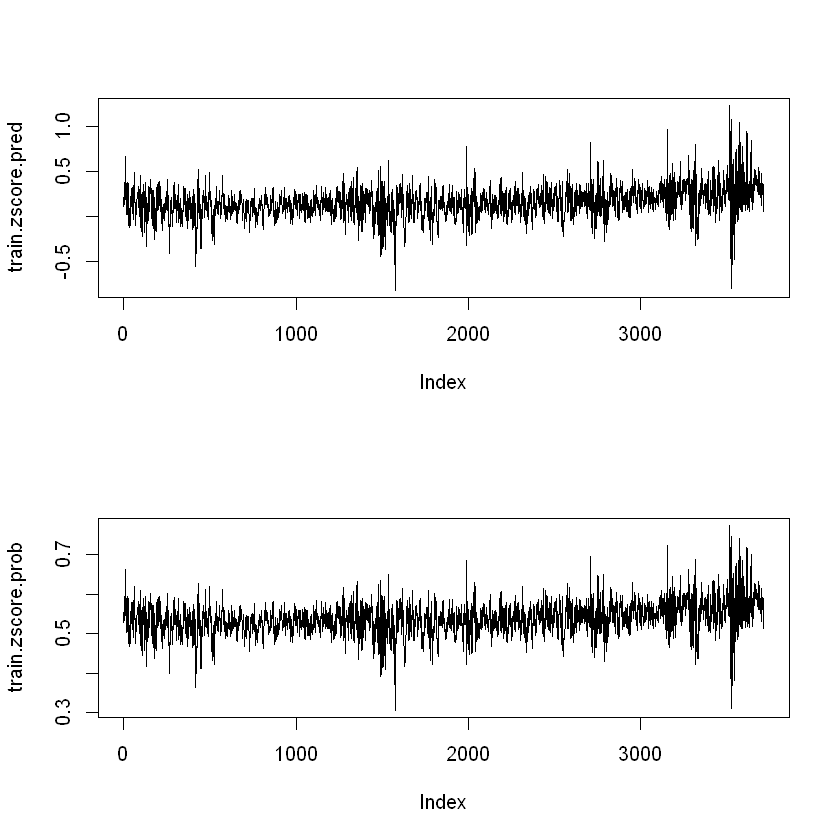

In [164]:
# Análise gráfica
par(mfrow = c(2,1))              

# Figura 1: previsão do modelo
plot(train.zscore.pred, type = "l")           

# Figura 2: probabilidade do modelo
plot(train.zscore.prob, type = "l")

In [165]:
# Classificação das probabilidades em 2 classes (1 = direção "Up" e 0 = direção "Down")
train.zscore.pred.direction <- NULL

# Direção para cima (Up)
train.zscore.pred.direction[train.zscore.prob > 0.5] <- 1    

# Direção para baixo (Down)
train.zscore.pred.direction[train.zscore.prob <= 0.5] <- 0

In [166]:
# Matriz de Confusão de treino
confusionMatrix(table(train.zscore.pred.direction,
                      GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))]$GSPC.Direction))

Confusion Matrix and Statistics

                           
train.zscore.pred.direction    0    1
                          0  306  287
                          1 1417 1708
                                          
               Accuracy : 0.5417          
                 95% CI : (0.5255, 0.5578)
    No Information Rate : 0.5366          
    P-Value [Acc > NIR] : 0.2715          
                                          
                  Kappa : 0.0353          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.1776          
            Specificity : 0.8561          
         Pos Pred Value : 0.5160          
         Neg Pred Value : 0.5466          
             Prevalence : 0.4634          
         Detection Rate : 0.0823          
   Detection Prevalence : 0.1595          
      Balanced Accuracy : 0.5169          
                                          
       '

In [105]:
# Packages
library(PRROC)

Warning message:
"package 'PRROC' was built under R version 3.6.3"

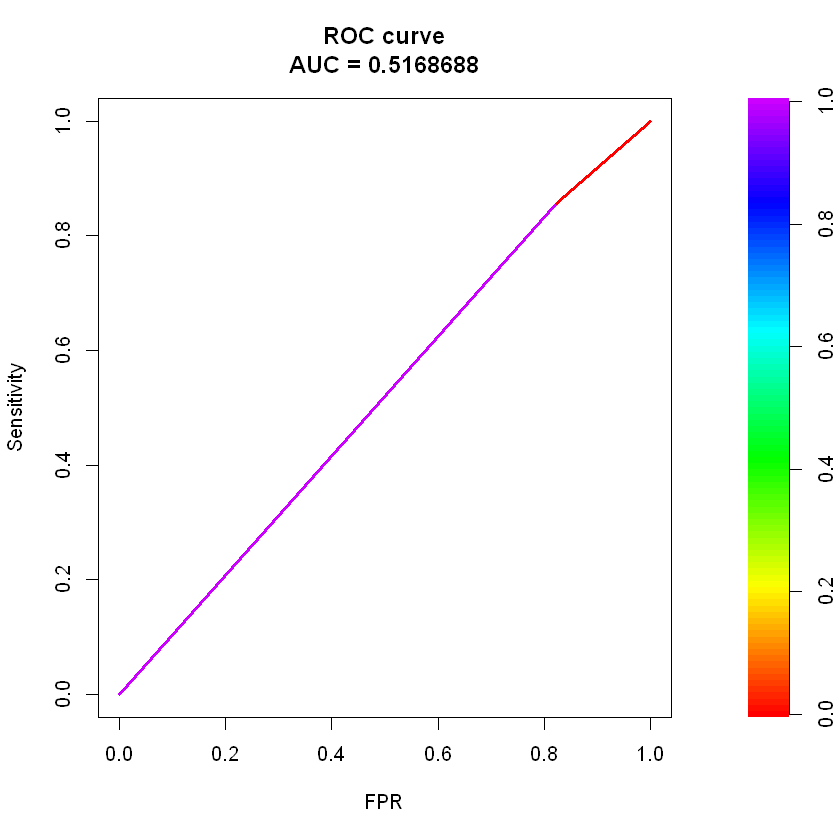

In [167]:
plot(roc.curve(scores.class0 = train.zscore.pred.direction, 
               weights.class0 = GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))]$GSPC.Direction, 
               curve=TRUE))

**Dados de teste**

In [168]:
# Ajustamento dos valores no mesmo conjunto de dados utilizados para estimar o valor melhor ajustado.
test.zscore.pred <- predict(train.zscore.model,
                            GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Trend'))])

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [169]:
# Conversão do output em uma forma probabilistica, que estará no intervalo [0,1]
test.zscore.prob <- 1 / (1 + exp(-(test.zscore.pred)))
head(test.zscore.prob) 

59        61        70        75        78        79 
0.4832529 0.5017925 0.5699370 0.5223619 0.5318809 0.4668549

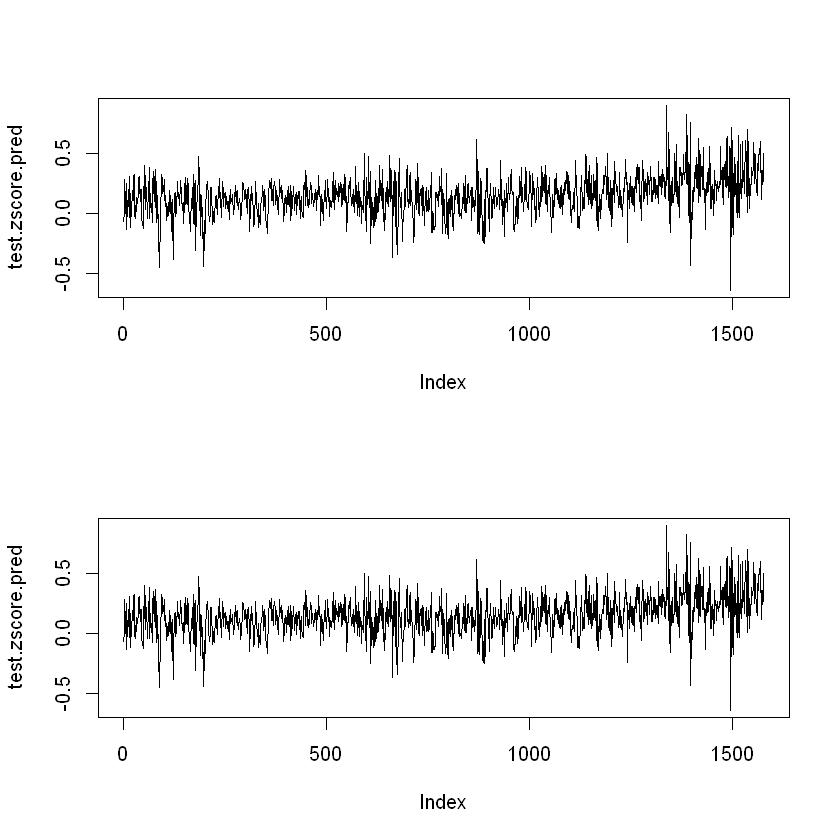

In [170]:
# Análise gráfica
par(mfrow = c(2,1))              

# Figura 1: previsão do modelo
plot(test.zscore.pred, type = "l")           

# Figura 2: probabilidade do modelo
plot(test.zscore.pred, type = "l")

In [171]:
# Classificação das probabilidades em 2 classes (1 = direção "Up" e 0 = direção "Down")
test.zscore.pred.direction <- NULL

# Direção para cima (Up)
test.zscore.pred.direction[test.zscore.prob > 0.5] <- 1    

# Direção para baixo (Down)
test.zscore.pred.direction[test.zscore.prob <= 0.5] <- 0

In [172]:
# Matriz de Confusão de treino
confusionMatrix(table(test.zscore.pred.direction,
                      GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Trend'))]$GSPC.Direction))

Confusion Matrix and Statistics

                          
test.zscore.pred.direction   0   1
                         0 122 129
                         1 605 721
                                          
               Accuracy : 0.5346          
                 95% CI : (0.5096, 0.5594)
    No Information Rate : 0.539           
    P-Value [Acc > NIR] : 0.6478          
                                          
                  Kappa : 0.0168          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.16781         
            Specificity : 0.84824         
         Pos Pred Value : 0.48606         
         Neg Pred Value : 0.54374         
             Prevalence : 0.46100         
         Detection Rate : 0.07736         
   Detection Prevalence : 0.15916         
      Balanced Accuracy : 0.50802         
                                          
       'Positive' 

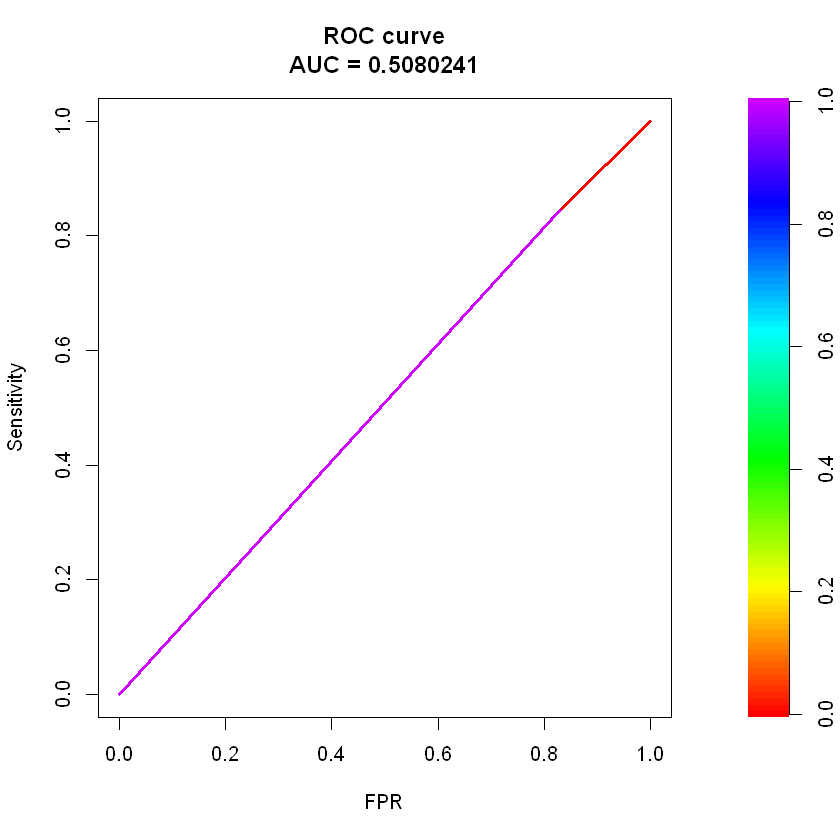

In [173]:
plot(roc.curve(scores.class0 = test.zscore.pred.direction, 
               weights.class0 = GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Trend'))]$GSPC.Direction, 
               curve=TRUE))

## 7.1.2 Dados minmax

**Dados de treino**

In [174]:
train.minmax.model <- glm(GSPC.Direction ~.,
                          data = GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Trend'))],
                          family = binomial)
summary(train.minmax.model)


Call:
glm(formula = GSPC.Direction ~ ., family = binomial, data = GSPC.minmax.train[, 
    !(names(GSPC.minmax.train) %in% c("GSPC.Trend"))])

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.493  -1.223   1.026   1.125   1.406  

Coefficients: (2 not defined because of singularities)
                Estimate Std. Error z value Pr(>|z|)
(Intercept)      0.17372    0.25825   0.673    0.501
GSPC.High        0.80371   12.08099   0.067    0.947
GSPC.Low        12.25061   10.82737   1.131    0.258
GSPC.Close     -14.22084   16.32263  -0.871    0.384
GSPC.Return     -0.16386    0.35683  -0.459    0.646
GSPC.SMA        -3.91710   21.10654  -0.186    0.853
GSPC.WMA         5.29936   25.96288   0.204    0.838
GSPC.MOM        -0.12250    0.40601  -0.302    0.763
GSPC.ROC              NA         NA      NA       NA
GSPC.StochK      0.01396    0.43017   0.032    0.974
GSPC.StochD     -0.30669    0.49014  -0.626    0.532
GSPC.RSI        -0.30331    0.30966  -0.980    0.327
GSPC.WPR

In [175]:
# Ajustamento dos valores no mesmo conjunto de dados utilizados para estimar o valor melhor ajustado.
train.minmax.pred <- predict(train.minmax.model, GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Trend'))])

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [176]:
# Conversão do output em uma forma probabilistica, que estará no intervalo [0,1]
train.minmax.prob <- 1 / (1 + exp(-(train.minmax.pred)))
head(train.minmax.prob) 

59        60        61        62        63        64 
0.4938930 0.5336715 0.5035509 0.5547065 0.5234808 0.5465670

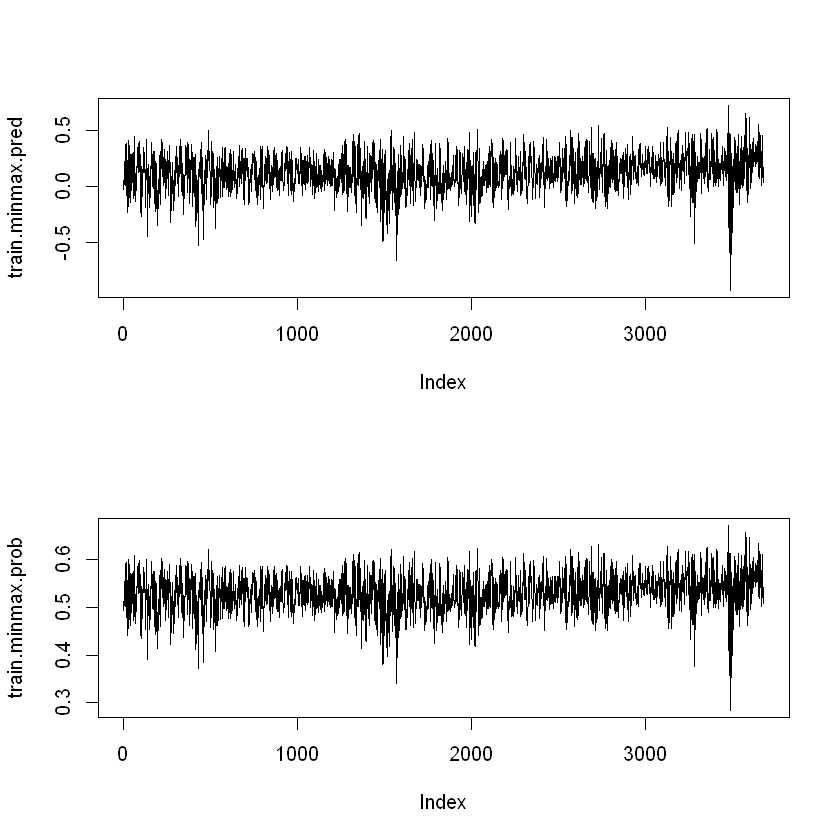

In [177]:
# Análise gráfica
par(mfrow = c(2,1))              

# Figura 1: previsão do modelo
plot(train.minmax.pred, type = "l")           

# Figura 2: probabilidade do modelo
plot(train.minmax.prob, type = "l")

In [178]:
# Classificação das probabilidades em 2 classes (1 = direção "Up" e 0 = direção "Down")
train.minmax.pred.direction <- NULL

# Direção para cima (Up)
train.minmax.pred.direction[train.minmax.prob > 0.5] <- 1    

# Direção para baixo (Down)
train.minmax.pred.direction[train.minmax.prob <= 0.5] <- 0

In [179]:
# Matriz de Confusão de treino
confusionMatrix(table(train.minmax.pred.direction,
                      GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Trend'))]$GSPC.Direction))

Confusion Matrix and Statistics

                           
train.minmax.pred.direction    0    1
                          0  363  339
                          1 1367 1615
                                          
               Accuracy : 0.5369          
                 95% CI : (0.5207, 0.5531)
    No Information Rate : 0.5304          
    P-Value [Acc > NIR] : 0.219           
                                          
                  Kappa : 0.0376          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.20983         
            Specificity : 0.82651         
         Pos Pred Value : 0.51709         
         Neg Pred Value : 0.54158         
             Prevalence : 0.46960         
         Detection Rate : 0.09853         
   Detection Prevalence : 0.19055         
      Balanced Accuracy : 0.51817         
                                          
       '

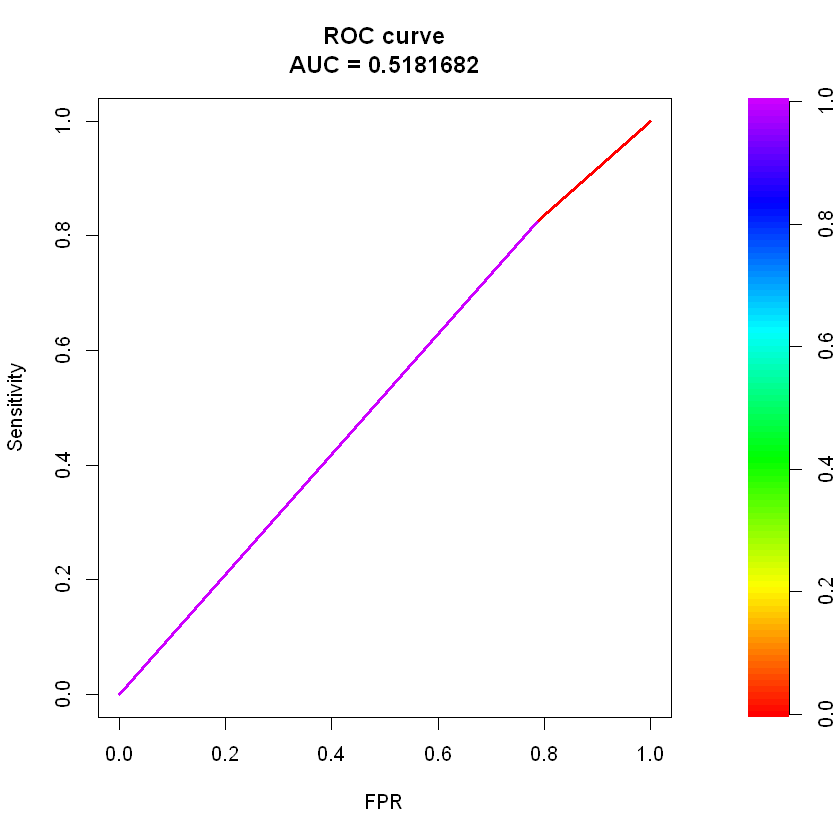

In [180]:
plot(roc.curve(scores.class0 = train.minmax.pred.direction, 
               weights.class0 = GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Trend'))]$GSPC.Direction, 
               curve=TRUE))

**Dados de teste**

In [181]:
# Ajustamento dos valores no mesmo conjunto de dados utilizados para estimar o valor melhor ajustado.
test.minmax.pred <- predict(train.minmax.model, GSPC.minmax.test[, !(names(GSPC.minmax.test) %in% c('GSPC.Trend'))])

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [182]:
# Conversão do output em uma forma probabilistica, que estará no intervalo [0,1]
test.minmax.prob <- 1 / (1 + exp(-(test.minmax.pred)))
head(test.minmax.prob) 

67        72        81        84        85        88 
0.5334812 0.5884889 0.4772825 0.5512596 0.5454072 0.5648019

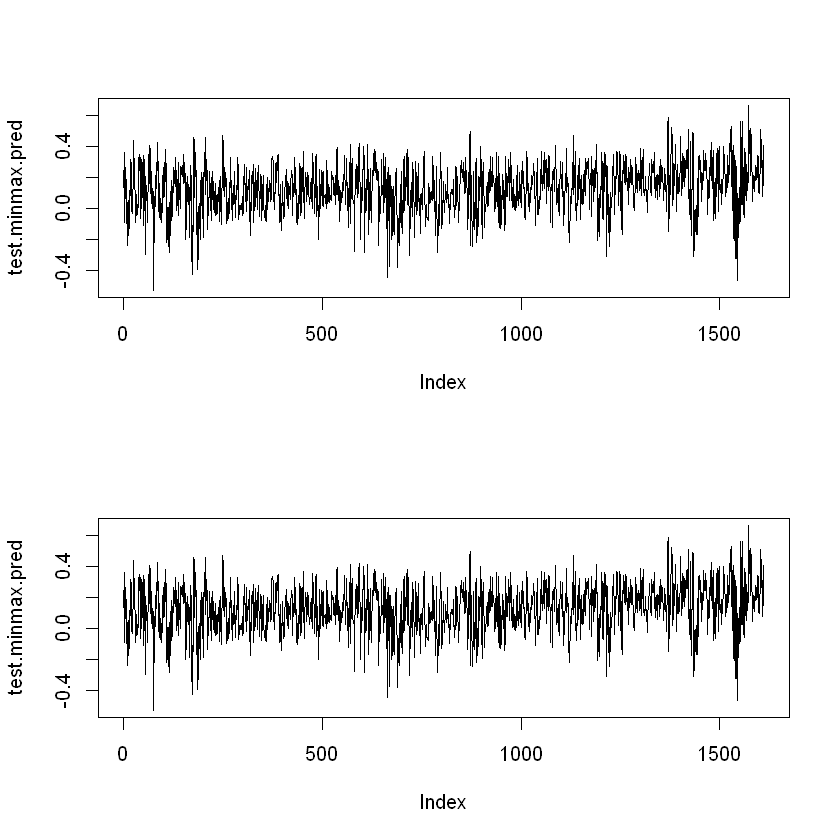

In [183]:
# Análise gráfica
par(mfrow = c(2,1))              

# Figura 1: previsão do modelo
plot(test.minmax.pred, type = "l")           

# Figura 2: probabilidade do modelo
plot(test.minmax.pred, type = "l")

In [184]:
# Classificação das probabilidades em 2 classes (1 = direção "Up" e 0 = direção "Down")
test.minmax.pred.direction <- NULL

# Direção para cima (Up)
test.minmax.pred.direction[test.minmax.prob > 0.5] <- 1    

# Direção para baixo (Down)
test.minmax.pred.direction[test.minmax.prob <= 0.5] <- 0

In [185]:
# Matriz de Confusão de treino
confusionMatrix(table(test.minmax.pred.direction,
                      GSPC.minmax.test[, !(names(GSPC.minmax.test) %in% c('GSPC.Trend'))]$GSPC.Direction))

Confusion Matrix and Statistics

                          
test.minmax.pred.direction   0   1
                         0 159 173
                         1 561 718
                                          
               Accuracy : 0.5444          
                 95% CI : (0.5197, 0.5689)
    No Information Rate : 0.5531          
    P-Value [Acc > NIR] : 0.7664          
                                          
                  Kappa : 0.0281          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.2208          
            Specificity : 0.8058          
         Pos Pred Value : 0.4789          
         Neg Pred Value : 0.5614          
             Prevalence : 0.4469          
         Detection Rate : 0.0987          
   Detection Prevalence : 0.2061          
      Balanced Accuracy : 0.5133          
                                          
       'Positive' 

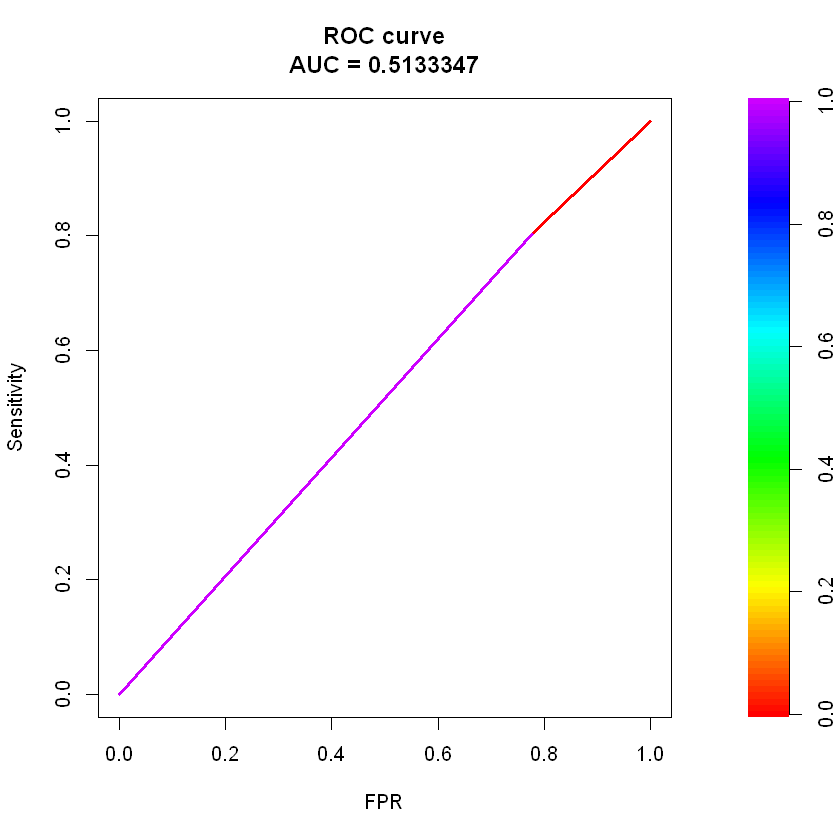

In [186]:
plot(roc.curve(scores.class0 = test.minmax.pred.direction, 
               weights.class0 = GSPC.minmax.test[, !(names(GSPC.minmax.test) %in% c('GSPC.Trend'))]$GSPC.Direction,
               curve=TRUE))

## 7.2. Árvore de Decisão

In [126]:
# Packages
library(rpart) 
library(rpart.plot)

Warning message:
"package 'rpart.plot' was built under R version 3.6.3"

### 7.2.1. Dados z-score

**Dados de treino**

In [187]:
# Criação da árvore de decisão
train.zscore.model.dt <- rpart(GSPC.Direction ~.,
                               GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))],
                               method = "class")

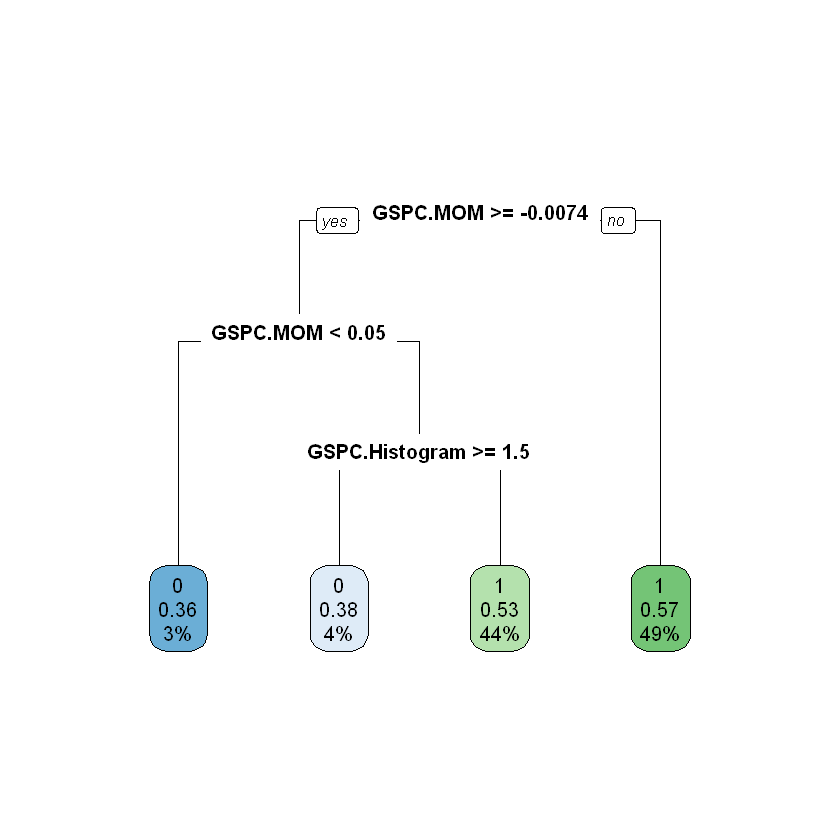

In [188]:
# Criação da árvore gráfica
rpart.plot(train.zscore.model.dt, type = 0, extra = 106, tweak = 1) 

In [189]:
# Importância dos atributos
train.zscore.imp <- varImp(train.zscore.model.dt, scale = F)
train.zscore.imp

,Overall
GSPC.CCI,2.713203
GSPC.Histogram,16.449756
GSPC.MOM,13.459341
GSPC.RSI,16.308028
GSPC.Signal,6.439096
GSPC.StochK,5.217606
GSPC.TRIX,6.517763
GSPC.WPR,5.217606
GSPC.High,0.000000
GSPC.Low,0.000000


In [190]:
# Previsão
train.zscore.dt.pred <- predict(train.zscore.model.dt,
                                GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))],
                                type = "class")

In [191]:
# Matriz de Confusão de treino
confusionMatrix(table(train.zscore.dt.pred,
                      GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Trend'))]$GSPC.Direction)) 

Confusion Matrix and Statistics

                    
train.zscore.dt.pred    0    1
                   0  161   94
                   1 1562 1901
                                          
               Accuracy : 0.5546          
                 95% CI : (0.5385, 0.5707)
    No Information Rate : 0.5366          
    P-Value [Acc > NIR] : 0.01431         
                                          
                  Kappa : 0.0492          
                                          
 Mcnemar's Test P-Value : < 2e-16         
                                          
            Sensitivity : 0.09344         
            Specificity : 0.95288         
         Pos Pred Value : 0.63137         
         Neg Pred Value : 0.54895         
             Prevalence : 0.46342         
         Detection Rate : 0.04330         
   Detection Prevalence : 0.06859         
      Balanced Accuracy : 0.52316         
                                          
       'Positive' Class : 0         

Pelo % de acurácia, há indícios de *overfitting*.

**Dados de teste**

In [192]:
# Previsão
test.zscore.dt.pred <- predict(train.zscore.model.dt,
                               GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Trend'))],
                               type = "class")

In [193]:
# Matriz de Confusão de teste
confusionMatrix(table(test.zscore.dt.pred,
                      GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Trend'))]$GSPC.Direction)) 

Confusion Matrix and Statistics

                   
test.zscore.dt.pred   0   1
                  0  57  45
                  1 670 805
                                          
               Accuracy : 0.5466          
                 95% CI : (0.5217, 0.5714)
    No Information Rate : 0.539           
    P-Value [Acc > NIR] : 0.2808          
                                          
                  Kappa : 0.0272          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.07840         
            Specificity : 0.94706         
         Pos Pred Value : 0.55882         
         Neg Pred Value : 0.54576         
             Prevalence : 0.46100         
         Detection Rate : 0.03614         
   Detection Prevalence : 0.06468         
      Balanced Accuracy : 0.51273         
                                          
       'Positive' Class : 0               
   

### 7.2.2. Dados minmax

As estimações não resultaram em um resultado significativo.

## 7.3. Random Forest

O algoritmo de *random forest* trabalha agregando as predições realizadas pelas diversas *decision trees* de profundidade variável. Cada *decision tree* no algoritmo é treinado em um subconjunto de dataset (*bootstrapped dataset*).

A porção de amostras que foram deixadas durante a construção de cada decision tree no algoritmo é referenciada como *dataset out-of-bag* (OOB). O modelo irá avaliar automaticamente seu desempenho rudando cada uma das amostras no dataset OOB através do algoritmo de *random forest*.

O critério de decisão para divisão de uma *decision tree* é por meio da impureza produzida por cada *feature* utilizando o índice de Gini ou entropia. No algoritmo de *random forest*, seleciona-se aleatoriamente um número predefinido de *features* candidatas. O último resultará em uma variância maior entre as árvores que, de certa forma, contenha as mesmas *features* (ou seja, aquelas que são altamente correlacionadas com o rótulo alvo).

Quando o algoritmo de *random forest* é utilizado para classificação e é apresentado com uma nova amostra, a predição final é feita tomando a maioria das predições realizadas por cada *decision treee* no *random forest*.

Obs.: *cross-validation* => utilizado para avaliar a eficiência de um modelo utilizando os dados de treinamento.

In [134]:
# Package
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked _by_ '.GlobalEnv':

    outlier

The following object is masked from 'package:ggplot2':

    margin



### 7.3.1. Dados z-score

**Dados de treino**

In [194]:
# Sintaxe básica
set.seed(123)
zscore.model.rf <- randomForest(as.factor(GSPC.Trend) ~ ., 
                                data = GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction'))],
                                method = 'rf',
                                trControl = trainControl(method = 'cv', number = 5))
zscore.model.rf

# data = GSPC.zscore.train.rf => dados de treino
# method = 'rf' => utilização do algoritmo de random forest
# method = 'cv' => validação cruzada
# number = 5 => 5 folds for cross-validation


Call:
 randomForest(formula = as.factor(GSPC.Trend) ~ ., data = GSPC.zscore.train[,      !(names(GSPC.zscore.train) %in% c("GSPC.Direction"))], method = "rf",      trControl = trainControl(method = "cv", number = 5)) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 49.44%
Confusion matrix:
        down nowhere   up class.error
down     662       0 1059   0.6153399
nowhere    0       0    2   1.0000000
up       777       0 1218   0.3894737

Por default, o número de *decision trees* no *random forest* é 500 e o número de *features* utilizadas como candidatas potenciais para cada divisão é 3. O modelo automaticamente tentará classificar cada uma das amostras no dataset OOB e mostrará uma matriz de confusão com os resultados.

Uma vez que este é um problema de classificação, utiliza-se uma matriz de confusão para avaliar o desempenho do modelo.

**Dados de teste**

In [195]:
# Previsão
test.zscore.rf.pred <- predict(zscore.model.rf,
                               GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Direction'))])

In [196]:
# Matriz de Confusão de teste
confusionMatrix(table(GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Direction'))]$GSPC.Trend,
                      test.zscore.rf.pred))

Confusion Matrix and Statistics

         test.zscore.rf.pred
          down nowhere  up
  down     267       0 459
  nowhere    1       0   0
  up       311       0 539

Overall Statistics
                                         
               Accuracy : 0.5111         
                 95% CI : (0.4861, 0.536)
    No Information Rate : 0.6328         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.002          
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               0.4611             NA    0.5401
Specificity               0.5401      0.9993659    0.4629
Pos Pred Value            0.3678             NA    0.6341
Neg Pred Value            0.6334             NA    0.3686
Prevalence                0.3672      0.0000000    0.6328
Detection Rate            0.1693      0.0000000    0.3418
Det

### 7.3.2. Dados minmax

**Dados de treino**

In [197]:
# Sintaxe básica
set.seed(123)
minmax.model.rf <- randomForest(as.factor(GSPC.Trend) ~ ., 
                                data = GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction'))], 
                                method = 'rf',
                                trControl = trainControl(method = 'cv', number = 5))
minmax.model.rf

# data = GSPC.zscore.train.rf => dados de treino
# method = 'rf' => utilização do algoritmo de random forest
# method = 'cv' => validação cruzada
# number = 5 => 5 folds for cross-validation


Call:
 randomForest(formula = as.factor(GSPC.Trend) ~ ., data = GSPC.minmax.train[,      !(names(GSPC.minmax.train) %in% c("GSPC.Direction"))], method = "rf",      trControl = trainControl(method = "cv", number = 5)) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 48.37%
Confusion matrix:
        down nowhere   up class.error
down     722       0 1007   0.5824176
nowhere    0       0    1   1.0000000
up       774       0 1180   0.3961105

In [198]:
# Previsão
train.minmax.rf.pred <- predict(minmax.model.rf, 
                                GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))])

In [199]:
# Matriz de Confusão de teste
confusionMatrix(table(GSPC.minmax.train$GSPC.Trend, train.minmax.rf.pred))

Confusion Matrix and Statistics

         train.minmax.rf.pred
          down nowhere   up
  down    1729       0    0
  nowhere    0       1    0
  up         0       0 1954

Overall Statistics
                                    
               Accuracy : 1         
                 95% CI : (0.999, 1)
    No Information Rate : 0.5304    
    P-Value [Acc > NIR] : < 2.2e-16 
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               1.0000      1.0000000    1.0000
Specificity               1.0000      1.0000000    1.0000
Pos Pred Value            1.0000      1.0000000    1.0000
Neg Pred Value            1.0000      1.0000000    1.0000
Prevalence                0.4693      0.0002714    0.5304
Detection Rate            0.4693      0.0002714    0.5304
Detection Prevalence      0.4693      0.000

**Dados de teste**

In [200]:
# Previsão
test.minmax.rf.pred <- predict(minmax.model.rf,
                               GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction'))])

In [201]:
# Matriz de Confusão de teste
confusionMatrix(table(GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction'))]$GSPC.Trend,
                      test.minmax.rf.pred))

Confusion Matrix and Statistics

         test.minmax.rf.pred
          down nowhere   up
  down    1729       0    0
  nowhere    0       1    0
  up         0       0 1954

Overall Statistics
                                    
               Accuracy : 1         
                 95% CI : (0.999, 1)
    No Information Rate : 0.5304    
    P-Value [Acc > NIR] : < 2.2e-16 
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               1.0000      1.0000000    1.0000
Specificity               1.0000      1.0000000    1.0000
Pos Pred Value            1.0000      1.0000000    1.0000
Neg Pred Value            1.0000      1.0000000    1.0000
Prevalence                0.4693      0.0002714    0.5304
Detection Rate            0.4693      0.0002714    0.5304
Detection Prevalence      0.4693      0.0002

## 7.4. K Nearest Neighborhood

In [145]:
# Package
library(class)

In [146]:
# Definição do número de Neighborhoods    
neighborhood <- 3

# O número de neighborhoods corresponde ao número de direções (Up, Down, NoWhere)

### 7.4.1. Dados z-score

**Dados de treino**

In [202]:
# modelo avaliado por treino
set.seed(123)
train.zscore.knn.model <- knn(GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              as.factor(GSPC.zscore.train$GSPC.Trend), neighborhood)   
head(train.zscore.knn.model)

[1] up   up   down down up   up  
Levels: down nowhere up

In [203]:
# Matriz de Confusão de treino
confusionMatrix(table(train.zscore.knn.model,
                      as.factor(GSPC.zscore.train$GSPC.Trend))) 

Confusion Matrix and Statistics

                      
train.zscore.knn.model down nowhere   up
               down    1210       1  413
               nowhere    0       0    2
               up       511       1 1580

Overall Statistics
                                          
               Accuracy : 0.7504          
                 95% CI : (0.7362, 0.7642)
    No Information Rate : 0.5366          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4967          
                                          
 Mcnemar's Test P-Value : 0.008378        

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               0.7031      0.0000000    0.7920
Specificity               0.7927      0.9994618    0.7028
Pos Pred Value            0.7451      0.0000000    0.7553
Neg Pred Value            0.7560      0.9994618    0.7448
Prevalence                0.4629      0.0005379    0.5366
De

**Dados de teste**

In [204]:
set.seed(123)
test.zscore.knn.model <- knn(GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              GSPC.zscore.test[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              as.factor(GSPC.zscore.train$GSPC.Trend), neighborhood)   
head(test.zscore.knn.model)

[1] up   up   down down down up  
Levels: down nowhere up

In [205]:
# Matriz de Confusão de teste
confusionMatrix(table(test.zscore.knn.model, as.factor(GSPC.zscore.test$GSPC.Trend))) 

Confusion Matrix and Statistics

                     
test.zscore.knn.model down nowhere  up
              down     325       0 372
              nowhere    0       0   0
              up       401       1 478

Overall Statistics
                                          
               Accuracy : 0.5092          
                 95% CI : (0.4842, 0.5341)
    No Information Rate : 0.539           
    P-Value [Acc > NIR] : 0.9917          
                                          
                  Kappa : 0.01            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               0.4477      0.0000000    0.5624
Specificity               0.5629      1.0000000    0.4470
Pos Pred Value            0.4663            NaN    0.5432
Neg Pred Value            0.5443      0.9993659    0.4663
Prevalence                0.4604      0.0006341    0.5390
Detection R

### 7.4.2. Dados minmax

**Dados de treino**

In [206]:
# modelo avaliado por treino
set.seed(123)
train.minmax.knn.model <- knn(GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              as.factor(GSPC.minmax.train$GSPC.Trend), neighborhood)   
head(train.minmax.knn.model)

[1] down up   down up   up   up  
Levels: down nowhere up

In [207]:
# Matriz de Confusão de treino
confusionMatrix(table(train.minmax.knn.model, as.factor(GSPC.minmax.train$GSPC.Trend))) 

Confusion Matrix and Statistics

                      
train.minmax.knn.model down nowhere   up
               down    1240       0  420
               nowhere    0       0    0
               up       489       1 1534

Overall Statistics
                                          
               Accuracy : 0.753           
                 95% CI : (0.7387, 0.7668)
    No Information Rate : 0.5304          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5031          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               0.7172      0.0000000    0.7851
Specificity               0.7852      1.0000000    0.7168
Pos Pred Value            0.7470            NaN    0.7579
Neg Pred Value            0.7584      0.9997286    0.7470
Prevalence                0.4693      0.0002714    0.5304
De

**Dados de teste**

In [208]:
set.seed(123)
test.minmax.knn.model <- knn(GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              GSPC.minmax.test[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))], 
                              as.factor(GSPC.minmax.train$GSPC.Trend), neighborhood)   
head(test.minmax.knn.model)

[1] down down up   up   down down
Levels: down nowhere up

In [209]:
# Matriz de Confusão de teste
confusionMatrix(table(test.minmax.knn.model, as.factor(GSPC.minmax.test$GSPC.Trend))) 

Confusion Matrix and Statistics

                     
test.minmax.knn.model down nowhere  up
              down     343       0 409
              nowhere    0       0   0
              up       375       2 482

Overall Statistics
                                          
               Accuracy : 0.5121          
                 95% CI : (0.4874, 0.5368)
    No Information Rate : 0.5531          
    P-Value [Acc > NIR] : 0.9996          
                                          
                  Kappa : 0.0184          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               0.4777       0.000000    0.5410
Specificity               0.5420       1.000000    0.4764
Pos Pred Value            0.4561            NaN    0.5611
Neg Pred Value            0.5634       0.998759    0.4561
Prevalence                0.4457       0.001241    0.5531
Detection R

## 7.5. Support Vector Machine

### 7.5.1. Dados z-score

**Dados de treino**

In [210]:
train.zscore.svm.model <- svm(GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction', 'GSPC.Trend'))],
                              as.factor(GSPC.zscore.train$GSPC.Trend))    
head(train.zscore.svm.model)

$call
svm.default(x = GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% 
    c("GSPC.Direction", "GSPC.Trend"))], y = as.factor(GSPC.zscore.train$GSPC.Trend))

$type
[1] 0

$kernel
[1] 2

$cost
[1] 1

$degree
[1] 3

$gamma
[1] 0.05555556


In [211]:
# Predição
train.zscore.svm.pred <- predict(train.zscore.svm.model,
                                 GSPC.zscore.train[, !(names(GSPC.zscore.train) %in% c('GSPC.Direction', 'GSPC.Trend'))]) 

# Matriz de Confusão
confusionMatrix(table(train.zscore.svm.pred, as.factor(GSPC.zscore.train$GSPC.Trend)))

Confusion Matrix and Statistics

                     
train.zscore.svm.pred down nowhere   up
              down     362       0  215
              nowhere    0       0    0
              up      1359       2 1780

Overall Statistics
                                        
               Accuracy : 0.5761        
                 95% CI : (0.56, 0.5921)
    No Information Rate : 0.5366        
    P-Value [Acc > NIR] : 6.843e-07     
                                        
                  Kappa : 0.1073        
                                        
 Mcnemar's Test P-Value : NA            

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity              0.21034      0.0000000    0.8922
Specificity              0.89234      1.0000000    0.2101
Pos Pred Value           0.62738            NaN    0.5667
Neg Pred Value           0.56734      0.9994621    0.6274
Prevalence               0.46288      0.0005379    0.5366
Detection Rate           

**Dados de teste**

In [212]:
# Predição
test.zscore.svm.pred <- predict(train.zscore.svm.model,
                                GSPC.zscore.test[, !(names(GSPC.zscore.test) %in% c('GSPC.Direction', 'GSPC.Trend'))]) 

# Matriz de Confusão
confusionMatrix(table(test.zscore.svm.pred, as.factor(GSPC.zscore.test$GSPC.Trend)))

Confusion Matrix and Statistics

                    
test.zscore.svm.pred down nowhere  up
             down     117       0 136
             nowhere    0       0   0
             up       609       1 714

Overall Statistics
                                         
               Accuracy : 0.5269         
                 95% CI : (0.502, 0.5518)
    No Information Rate : 0.539          
    P-Value [Acc > NIR] : 0.8377         
                                         
                  Kappa : 0.0012         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity              0.16116      0.0000000    0.8400
Specificity              0.84019      1.0000000    0.1609
Pos Pred Value           0.46245            NaN    0.5393
Neg Pred Value           0.54003      0.9993659    0.4625
Prevalence               0.46037      0.0006341    0.5390
Detection Rate           

### 7.5.2. Dados minmax

**Dados de treino**

In [213]:
train.minmax.svm.model <- svm(GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))],
                              as.factor(GSPC.minmax.train$GSPC.Trend))    
head(train.minmax.svm.model)

$call
svm.default(x = GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% 
    c("GSPC.Direction", "GSPC.Trend"))], y = as.factor(GSPC.minmax.train$GSPC.Trend))

$type
[1] 0

$kernel
[1] 2

$cost
[1] 1

$degree
[1] 3

$gamma
[1] 0.05882353


In [214]:
# Predição
train.minmax.svm.pred <- predict(train.minmax.svm.model,
                                 GSPC.minmax.train[, !(names(GSPC.minmax.train) %in% c('GSPC.Direction', 'GSPC.Trend'))]) 

# Matriz de Confusão
confusionMatrix(table(train.minmax.svm.pred, as.factor(GSPC.minmax.train$GSPC.Trend)))

Confusion Matrix and Statistics

                     
train.minmax.svm.pred down nowhere   up
              down     294       0  160
              nowhere    0       0    0
              up      1435       1 1794

Overall Statistics
                                          
               Accuracy : 0.5668          
                 95% CI : (0.5506, 0.5829)
    No Information Rate : 0.5304          
    P-Value [Acc > NIR] : 5.046e-06       
                                          
                  Kappa : 0.092           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity               0.1700      0.0000000    0.9181
Specificity               0.9182      1.0000000    0.1699
Pos Pred Value            0.6476            NaN    0.5554
Neg Pred Value            0.5557      0.9997286    0.6476
Prevalence                0.4693      0.0002714    0.5304
Detecti

**Dados de teste**

In [215]:
# Predição
test.minmax.svm.pred <- predict(train.minmax.svm.model,
                                GSPC.minmax.test[, !(names(GSPC.minmax.test) %in% c('GSPC.Direction', 'GSPC.Trend'))]) 

# Matriz de Confusão
confusionMatrix(table(test.minmax.svm.pred, as.factor(GSPC.minmax.test$GSPC.Trend)))

Confusion Matrix and Statistics

                    
test.minmax.svm.pred down nowhere  up
             down      85       0 119
             nowhere    0       0   0
             up       633       2 772

Overall Statistics
                                          
               Accuracy : 0.532           
                 95% CI : (0.5073, 0.5566)
    No Information Rate : 0.5531          
    P-Value [Acc > NIR] : 0.9579          
                                          
                  Kappa : -0.0163         
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: down Class: nowhere Class: up
Sensitivity              0.11838       0.000000    0.8664
Specificity              0.86674       1.000000    0.1181
Pos Pred Value           0.41667            NaN    0.5487
Neg Pred Value           0.55011       0.998759    0.4167
Prevalence               0.44569       0.001241    0.5531
Detection Rate  